In [1]:
import pandas as pd

CSV_PATH = "../data/1ersemestre2025.csv"

# Intentar lectura normal
try:
    df = pd.read_csv(CSV_PATH)
except UnicodeDecodeError:
    df = pd.read_csv(CSV_PATH, encoding="latin1")

df.shape, df.columns.tolist()

((19795, 19),
 ['ID',
  'FECHA EN QUE SE CREO',
  'DIA EN QUE SE CREO',
  'HORA EN QUE SE CREO',
  'EDAD CONSUMIDOR',
  'FORMA DE CONTACTO',
  'GENERO CONSUMIDOR',
  'GENERO CONSULTANTE',
  'LOCALIDAD CONSUMIDOR',
  'LOCALIDAD CONSULTANTE',
  'MODALIDAD DE CONSULTA',
  'MOTIVO DE CONSULTA',
  'NO EFECTIVA DESCRIPCION',
  'PROVINCIA CONSUMIDOR',
  'PROVINCIA CONSULTANTE',
  'CONSULTANTE',
  'TIEMPO DE CONSUMO',
  'TIPO DE CONSULTA',
  'TRATAMIENTO'])

In [2]:
import numpy as np

def demojibake(s):
    """Arreglo robusto cuando texto UTF-8 fue leído como latin1."""
    if pd.isna(s): return s
    s = str(s)
    try:
        return s.encode("latin1").decode("utf-8")
    except Exception:
        return s

def fix_text(s):
    if pd.isna(s): return s
    s = demojibake(s).strip()
    rep = {
        "Ã¡":"á","Ã©":"é","Ãí":"í","Ã³":"ó","Ãº":"ú","Ãñ":"ñ",
        "ÃÁ":"Á","Ã‰":"É","ÃÍ":"Í","Ã“":"Ó","Ãš":"Ú","Ã‘":"Ñ",
        "Ã¼":"ü","Ãœ":"Ü"
    }
    for k,v in rep.items():
        s = s.replace(k,v)
    return s

for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].apply(fix_text)

df.head(5)

,ID,FECHA EN QUE SE CREO,DIA EN QUE SE CREO,HORA EN QUE SE CREO,EDAD CONSUMIDOR,FORMA DE CONTACTO,GENERO CONSUMIDOR,GENERO CONSULTANTE,LOCALIDAD CONSUMIDOR,LOCALIDAD CONSULTANTE,MODALIDAD DE CONSULTA,MOTIVO DE CONSULTA,NO EFECTIVA DESCRIPCION,PROVINCIA CONSUMIDOR,PROVINCIA CONSULTANTE,CONSULTANTE,TIEMPO DE CONSUMO,TIPO DE CONSULTA,TRATAMIENTO
0,345712,01/01/2025,MIÉRCOLES,00:39:44,29.0,Lo tenía agendado,Varón,Varón,CABALLITO,CABALLITO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Nunca estuvo
1,345713,01/01/2025,MIÉRCOLES,02:01:04,NaN,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Equivocados,NaN,NaN,NaN,NaN,No Efectiva,NaN
2,345714,01/01/2025,MIÉRCOLES,07:27:09,45.0,Lo tenía agendado,Varón,Varón,RETIRO,RETIRO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Tratamiento psiquiátrico
3,345715,01/01/2025,MIÉRCOLES,07:29:43,NaN,Lo tenía agendado,NaN,Varón,NaN,CORDOBA,Consulta a la línea 141,NaN,NaN,NaN,Córdoba,Consumidor,NaN,Informe,NaN
4,345716,01/01/2025,MIÉRCOLES,07:34:03,37.0,Lo tenía agendado,Varón,Varón,MORENO,MORENO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Buenos Aires,Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Sin Definir


In [10]:
df['EDAD CONSUMIDOR'] = df['EDAD CONSUMIDOR'].astype('Int64')

df.head(20)

,ID,FECHA EN QUE SE CREO,DIA EN QUE SE CREO,HORA EN QUE SE CREO,EDAD CONSUMIDOR,FORMA DE CONTACTO,GENERO CONSUMIDOR,GENERO CONSULTANTE,LOCALIDAD CONSUMIDOR,LOCALIDAD CONSULTANTE,MODALIDAD DE CONSULTA,MOTIVO DE CONSULTA,NO EFECTIVA DESCRIPCION,PROVINCIA CONSUMIDOR,PROVINCIA CONSULTANTE,CONSULTANTE,TIEMPO DE CONSUMO,TIPO DE CONSULTA,TRATAMIENTO
0,345712,01/01/2025,MIÉRCOLES,00:39:44,29,Lo tenía agendado,Varón,Varón,CABALLITO,CABALLITO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Nunca estuvo
1,345713,01/01/2025,MIÉRCOLES,02:01:04,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Equivocados,NaN,NaN,NaN,NaN,No Efectiva,NaN
2,345714,01/01/2025,MIÉRCOLES,07:27:09,45,Lo tenía agendado,Varón,Varón,RETIRO,RETIRO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Tratamiento psiquiátrico
3,345715,01/01/2025,MIÉRCOLES,07:29:43,<NA>,Lo tenía agendado,NaN,Varón,NaN,CORDOBA,Consulta a la línea 141,NaN,NaN,NaN,Córdoba,Consumidor,NaN,Informe,NaN
4,345716,01/01/2025,MIÉRCOLES,07:34:03,37,Lo tenía agendado,Varón,Varón,MORENO,MORENO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Buenos Aires,Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Sin Definir
5,345717,01/01/2025,MIÉRCOLES,07:40:06,28,Lo tenía agendado,Varón,Varón,1A. SECCION,1A. SECCION,Consulta a la línea 141,Crisis en situación de consumo,NaN,Mendoza,Mendoza,Amigo,Más de 10 años,Consulta Indirecta,Está/Estuvo en tratamiento
6,345718,01/01/2025,MIÉRCOLES,07:40:27,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Cortes,NaN,NaN,NaN,NaN,No Efectiva,NaN
7,345719,01/01/2025,MIÉRCOLES,07:40:27,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Cortes,NaN,NaN,NaN,NaN,No Efectiva,NaN
8,345720,01/01/2025,MIÉRCOLES,07:40:27,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Cortes,NaN,NaN,NaN,NaN,No Efectiva,NaN
9,345721,01/01/2025,MIÉRCOLES,07:40:27,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Cortes,NaN,NaN,NaN,NaN,No Efectiva,NaN


In [13]:
# Información general del dataset
df.info()
# Cardinalidad (valores únicos) por columna
df.nunique()
# Confirmar semántica con primeras filas
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19795 entries, 0 to 19794
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       19795 non-null  int64 
 1   FECHA EN QUE SE CREO     19795 non-null  object
 2   DIA EN QUE SE CREO       19795 non-null  object
 3   HORA EN QUE SE CREO      19795 non-null  object
 4   EDAD CONSUMIDOR          8038 non-null   Int64 
 5   FORMA DE CONTACTO        14091 non-null  object
 6   GENERO CONSUMIDOR        8309 non-null   object
 7   GENERO CONSULTANTE       14091 non-null  object
 8   LOCALIDAD CONSUMIDOR     8071 non-null   object
 9   LOCALIDAD CONSULTANTE    12905 non-null  object
 10  MODALIDAD DE CONSULTA    19795 non-null  object
 11  MOTIVO DE CONSULTA       7850 non-null   object
 12  NO EFECTIVA DESCRIPCION  5704 non-null   object
 13  PROVINCIA CONSUMIDOR     8177 non-null   object
 14  PROVINCIA CONSULTANTE    13318 non-nul

,ID,FECHA EN QUE SE CREO,DIA EN QUE SE CREO,HORA EN QUE SE CREO,EDAD CONSUMIDOR,FORMA DE CONTACTO,GENERO CONSUMIDOR,GENERO CONSULTANTE,LOCALIDAD CONSUMIDOR,LOCALIDAD CONSULTANTE,MODALIDAD DE CONSULTA,MOTIVO DE CONSULTA,NO EFECTIVA DESCRIPCION,PROVINCIA CONSUMIDOR,PROVINCIA CONSULTANTE,CONSULTANTE,TIEMPO DE CONSUMO,TIPO DE CONSULTA,TRATAMIENTO
0,345712,01/01/2025,MIÉRCOLES,00:39:44,29,Lo tenía agendado,Varón,Varón,CABALLITO,CABALLITO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Nunca estuvo
1,345713,01/01/2025,MIÉRCOLES,02:01:04,<NA>,NaN,NaN,NaN,NaN,NaN,Consulta a la línea 141,NaN,Equivocados,NaN,NaN,NaN,NaN,No Efectiva,NaN
2,345714,01/01/2025,MIÉRCOLES,07:27:09,45,Lo tenía agendado,Varón,Varón,RETIRO,RETIRO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Ciudad Autónoma de Buenos Aires,Ciudad Autónoma de Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Tratamiento psiquiátrico
3,345715,01/01/2025,MIÉRCOLES,07:29:43,<NA>,Lo tenía agendado,NaN,Varón,NaN,CORDOBA,Consulta a la línea 141,NaN,NaN,NaN,Córdoba,Consumidor,NaN,Informe,NaN
4,345716,01/01/2025,MIÉRCOLES,07:34:03,37,Lo tenía agendado,Varón,Varón,MORENO,MORENO,Consulta a la línea 141,Crisis en situación de consumo,NaN,Buenos Aires,Buenos Aires,Consumidor,Más de 10 años,Consulta Directa,Sin Definir


In [14]:
# Conteo y porcentaje de nulos por columna
nulos = pd.DataFrame({
    'Columna': df.columns,
    'Nulos': df.isnull().sum(),
    'Porcentaje': (df.isnull().sum() / len(df) * 100).round(2)
})
print(nulos)

                                         Columna  Nulos  Porcentaje
ID                                            ID      0        0.00
FECHA EN QUE SE CREO        FECHA EN QUE SE CREO      0        0.00
DIA EN QUE SE CREO            DIA EN QUE SE CREO      0        0.00
HORA EN QUE SE CREO          HORA EN QUE SE CREO      0        0.00
EDAD CONSUMIDOR                  EDAD CONSUMIDOR  11757       59.39
FORMA DE CONTACTO              FORMA DE CONTACTO   5704       28.82
GENERO CONSUMIDOR              GENERO CONSUMIDOR  11486       58.02
GENERO CONSULTANTE            GENERO CONSULTANTE   5704       28.82
LOCALIDAD CONSUMIDOR        LOCALIDAD CONSUMIDOR  11724       59.23
LOCALIDAD CONSULTANTE      LOCALIDAD CONSULTANTE   6890       34.81
MODALIDAD DE CONSULTA      MODALIDAD DE CONSULTA      0        0.00
MOTIVO DE CONSULTA            MOTIVO DE CONSULTA  11945       60.34
NO EFECTIVA DESCRIPCION  NO EFECTIVA DESCRIPCION  14091       71.18
PROVINCIA CONSUMIDOR        PROVINCIA CONSUMIDOR

In [15]:
# Verificar duplicados
duplicados = df.duplicated().sum()
print(f"Total de filas duplicadas: {duplicados}")

# Si querés ver cuáles son (opcional):
if duplicados > 0:
    print("\nPrimeras filas duplicadas:")
    print(df[df.duplicated(keep=False)].head(10))

Total de filas duplicadas: 0


In [16]:
# Revisar valores "vacíos" o inconsistentes en columnas categóricas clave
columnas_revisar = ['FORMA DE CONTACTO', 'GENERO CONSUMIDOR', 'GENERO CONSULTANTE', 
                    'TIPO DE CONSULTA', 'CONSULTANTE', 'TRATAMIENTO', 'TIEMPO DE CONSUMO',
                    'MOTIVO DE CONSULTA']

for col in columnas_revisar:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts(dropna=False).head(10))
        print("-" * 50)


FORMA DE CONTACTO:
FORMA DE CONTACTO
Sin definir                 8045
NaN                         5704
Lo busca en internet        3106
Lo tenía agendado           1981
Otro                         219
Publicidad en televisión     214
Orientación Profesional      204
A través de un amigo         128
A través de familiares       118
No recuerda                   32
Name: count, dtype: int64
--------------------------------------------------

GENERO CONSUMIDOR:
GENERO CONSUMIDOR
NaN            11486
Varón           6893
Mujer           1313
Sin definir       96
Trans              7
Name: count, dtype: int64
--------------------------------------------------

GENERO CONSULTANTE:
GENERO CONSULTANTE
Mujer          8947
NaN            5704
Varón          4963
Sin definir     171
Trans             7
Otro              2
Otros             1
Name: count, dtype: int64
--------------------------------------------------

TIPO DE CONSULTA:
TIPO DE CONSULTA
Consulta Indirecta    6024
Informe        

In [17]:
# Verificar en qué tipo de llamadas aparece "Sin definir" en FORMA DE CONTACTO
print("Distribución de 'Sin definir' por TIPO DE CONSULTA:")
print(df[df['FORMA DE CONTACTO'] == 'Sin definir']['TIPO DE CONSULTA'].value_counts())
print("\n" + "="*60 + "\n")

# Ver algunos ejemplos de registros con "Sin definir"
print("Ejemplos de registros con FORMA DE CONTACTO = 'Sin definir':")
print(df[df['FORMA DE CONTACTO'] == 'Sin definir'][['TIPO DE CONSULTA', 'MOTIVO DE CONSULTA', 
                                                       'CONSULTANTE', 'NO EFECTIVA DESCRIPCION']].head(10))

Distribución de 'Sin definir' por TIPO DE CONSULTA:
TIPO DE CONSULTA
Consulta Indirecta    4021
Informe               2745
Consulta Directa      1279
Name: count, dtype: int64


Ejemplos de registros con FORMA DE CONTACTO = 'Sin definir':
      TIPO DE CONSULTA               MOTIVO DE CONSULTA CONSULTANTE  \
37             Informe                              NaN  Consumidor   
39  Consulta Indirecta  Inquietudes por el tipo de vida     Hermano   
44             Informe                              NaN        Otro   
51  Consulta Indirecta                 Fugas de la casa       Madre   
55             Informe                              NaN      Vecino   
58             Informe                              NaN  Consumidor   
60  Consulta Indirecta              Agresión a terceros       Madre   
65             Informe                              NaN        Otro   
66  Consulta Indirecta                 Fugas de la casa       Amigo   
76             Informe                             

In [18]:
# Convertir FECHA EN QUE SE CREO a datetime
df['FECHA EN QUE SE CREO'] = pd.to_datetime(df['FECHA EN QUE SE CREO'], dayfirst=True)

# Verificar conversión
print("Tipo de dato de FECHA:")
print(df['FECHA EN QUE SE CREO'].dtype)
print("\nPrimeras fechas:")
print(df['FECHA EN QUE SE CREO'].head())


Tipo de dato de FECHA:
datetime64[ns]

Primeras fechas:
0   2025-01-01
1   2025-01-01
2   2025-01-01
3   2025-01-01
4   2025-01-01
Name: FECHA EN QUE SE CREO, dtype: datetime64[ns]


In [19]:
# Convertir HORA EN QUE SE CREO a datetime y extraer hora numérica
df['HORA'] = pd.to_datetime(df['HORA EN QUE SE CREO'], format='%H:%M:%S').dt.hour

# Verificar conversión
print("Distribución de horas (0-23):")
print(df['HORA'].value_counts().sort_index())


Distribución de horas (0-23):
HORA
0      293
1      212
2      151
3      121
4      167
5       84
6      242
7      418
8      576
9     1050
10    1621
11    1712
12    1476
13    1473
14    1425
15    1363
16    1332
17    1164
18    1154
19    1161
20     806
21     788
22     615
23     391
Name: count, dtype: int64


In [20]:
# Derivar MES y DIA_SEMANA desde la fecha
df['MES'] = df['FECHA EN QUE SE CREO'].dt.month
df['DIA_SEMANA'] = df['FECHA EN QUE SE CREO'].dt.day_name()

# Traducir nombres de días al español
dias_esp = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df['DIA_SEMANA'] = df['DIA_SEMANA'].map(dias_esp)

# Verificar resultados
print("Meses presentes en el dataset:")
print(df['MES'].value_counts().sort_index())
print("\nDías de la semana:")
print(df['DIA_SEMANA'].value_counts())

Meses presentes en el dataset:
MES
1    3703
2    3137
3    3148
4    3457
5    3279
6    3071
Name: count, dtype: int64

Días de la semana:
DIA_SEMANA
Lunes        3533
Miércoles    3500
Martes       3445
Viernes      2829
Jueves       2822
Sábado       1907
Domingo      1759
Name: count, dtype: int64


In [21]:
# Crear FRANJA_HORARIA
def asignar_franja(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['FRANJA_HORARIA'] = df['HORA'].apply(asignar_franja)

# Verificar distribución
print("Distribución por FRANJA_HORARIA:")
print(df['FRANJA_HORARIA'].value_counts())


Distribución por FRANJA_HORARIA:
FRANJA_HORARIA
Tarde        8233
Mañana       5619
Noche        4915
Madrugada    1028
Name: count, dtype: int64


In [22]:
# Crear ES_FIN_DE_SEMANA (opcional pero útil)
df['ES_FIN_DE_SEMANA'] = df['DIA_SEMANA'].isin(['Sábado', 'Domingo'])

# Verificar distribución
print("Distribución fin de semana vs. días laborales:")
print(df['ES_FIN_DE_SEMANA'].value_counts())
print(f"\nPorcentaje de llamadas en fin de semana: {(df['ES_FIN_DE_SEMANA'].sum() / len(df) * 100):.2f}%")


Distribución fin de semana vs. días laborales:
ES_FIN_DE_SEMANA
False    16129
True      3666
Name: count, dtype: int64

Porcentaje de llamadas en fin de semana: 18.52%


In [23]:
# Dataset A: llamadas EFECTIVAS (NO EFECTIVA DESCRIPCION es NaN)
df_efectivas = df[df['NO EFECTIVA DESCRIPCION'].isna()].copy()

print(f"Total de llamadas EFECTIVAS: {len(df_efectivas)}")
print(f"Porcentaje del total: {(len(df_efectivas) / len(df) * 100):.2f}%")
print("\nDistribución por TIPO DE CONSULTA:")
print(df_efectivas['TIPO DE CONSULTA'].value_counts())

Total de llamadas EFECTIVAS: 14091
Porcentaje del total: 71.18%

Distribución por TIPO DE CONSULTA:
TIPO DE CONSULTA
Consulta Indirecta    6024
Informe               5782
Consulta Directa      2285
Name: count, dtype: int64


In [24]:
# Dataset B: llamadas NO EFECTIVAS (NO EFECTIVA DESCRIPCION no es NaN)
df_no_efectivas = df[df['NO EFECTIVA DESCRIPCION'].notna()].copy()

print(f"Total de llamadas NO EFECTIVAS: {len(df_no_efectivas)}")
print(f"Porcentaje del total: {(len(df_no_efectivas) / len(df) * 100):.2f}%")
print("\nDistribución por tipo de no efectiva:")
print(df_no_efectivas['NO EFECTIVA DESCRIPCION'].value_counts())


Total de llamadas NO EFECTIVAS: 5704
Porcentaje del total: 28.82%

Distribución por tipo de no efectiva:
NO EFECTIVA DESCRIPCION
Cortes             2020
Equivocados        1649
Insultos/Bromas    1129
Silencio            906
Name: count, dtype: int64


In [25]:
# Confirmar que la suma coincide con el total
print(f"Total original: {len(df)}")
print(f"Efectivas + No efectivas: {len(df_efectivas) + len(df_no_efectivas)}")
print(f"¿Coinciden? {len(df) == len(df_efectivas) + len(df_no_efectivas)}")

Total original: 19795
Efectivas + No efectivas: 19795
¿Coinciden? True


In [26]:
# Variables seleccionadas para clustering
variables_numericas = ['EDAD CONSUMIDOR', 'HORA', 'MES']

variables_categoricas = [
    'GENERO CONSUMIDOR',
    'GENERO CONSULTANTE', 
    'PROVINCIA CONSULTANTE',
    'TIPO DE CONSULTA',
    'MOTIVO DE CONSULTA',
    'MODALIDAD DE CONSULTA',
    'TRATAMIENTO',
    'TIEMPO DE CONSUMO',
    'CONSULTANTE',
    'FRANJA_HORARIA',
    'DIA_SEMANA',
    'ES_FIN_DE_SEMANA'
]

# Verificar que todas las columnas existan en df_efectivas
print("Variables numéricas seleccionadas:")
for var in variables_numericas:
    print(f"  - {var}: {df_efectivas[var].dtype}, {df_efectivas[var].notna().sum()} valores no nulos")

print("\nVariables categóricas seleccionadas:")
for var in variables_categoricas:
    print(f"  - {var}: {df_efectivas[var].nunique()} categorías únicas, {df_efectivas[var].notna().sum()} valores no nulos")


Variables numéricas seleccionadas:
  - EDAD CONSUMIDOR: Int64, 8038 valores no nulos
  - HORA: int32, 14091 valores no nulos
  - MES: int32, 14091 valores no nulos

Variables categóricas seleccionadas:
  - GENERO CONSUMIDOR: 4 categorías únicas, 8309 valores no nulos
  - GENERO CONSULTANTE: 6 categorías únicas, 14091 valores no nulos
  - PROVINCIA CONSULTANTE: 24 categorías únicas, 13318 valores no nulos
  - TIPO DE CONSULTA: 3 categorías únicas, 14091 valores no nulos
  - MOTIVO DE CONSULTA: 22 categorías únicas, 7850 valores no nulos
  - MODALIDAD DE CONSULTA: 3 categorías únicas, 14091 valores no nulos
  - TRATAMIENTO: 7 categorías únicas, 8309 valores no nulos
  - TIEMPO DE CONSUMO: 5 categorías únicas, 8309 valores no nulos
  - CONSULTANTE: 14 categorías únicas, 14091 valores no nulos
  - FRANJA_HORARIA: 4 categorías únicas, 14091 valores no nulos
  - DIA_SEMANA: 7 categorías únicas, 14091 valores no nulos
  - ES_FIN_DE_SEMANA: 2 categorías únicas, 14091 valores no nulos


In [27]:
# Estandarizar: strip espacios y normalizar mayúsculas/minúsculas en categorías
for col in variables_categoricas:
    if df_efectivas[col].dtype == 'object':
        df_efectivas[col] = df_efectivas[col].str.strip()

# Unificar variantes de "Sin definir" / "Sin Definir" / etc.
# Primero ver si existen variantes
print("Verificando variantes de 'Sin definir' antes de unificar:\n")
for col in variables_categoricas:
    valores_sin = df_efectivas[col].dropna().unique()
    sin_definir_vars = [v for v in valores_sin if 'sin' in str(v).lower() and 'defin' in str(v).lower()]
    if sin_definir_vars:
        print(f"{col}: {sin_definir_vars}")

Verificando variantes de 'Sin definir' antes de unificar:

GENERO CONSUMIDOR: ['Sin definir']
GENERO CONSULTANTE: ['Sin definir']
MOTIVO DE CONSULTA: ['Sin definir']
TRATAMIENTO: ['Sin Definir']
TIEMPO DE CONSUMO: ['Sin Definir']
CONSULTANTE: ['Sin definir']


In [28]:
# Unificar todas las variantes a "Sin definir" (minúscula)
for col in variables_categoricas:
    if df_efectivas[col].dtype == 'object':
        df_efectivas[col] = df_efectivas[col].replace('Sin Definir', 'Sin definir')

# Verificar que se unificó correctamente
print("Verificación post-unificación:\n")
for col in ['GENERO CONSUMIDOR', 'TRATAMIENTO', 'TIEMPO DE CONSUMO']:
    sin_def_count = (df_efectivas[col] == 'Sin definir').sum()
    print(f"{col}: {sin_def_count} valores 'Sin definir'")


Verificación post-unificación:

GENERO CONSUMIDOR: 96 valores 'Sin definir'
TRATAMIENTO: 805 valores 'Sin definir'
TIEMPO DE CONSUMO: 1714 valores 'Sin definir'


In [29]:
# Revisar outliers en EDAD CONSUMIDOR
print("Estadísticas de EDAD CONSUMIDOR:")
print(df_efectivas['EDAD CONSUMIDOR'].describe())
print("\nDistribución de edades extremas:")
print(f"Edades < 10: {(df_efectivas['EDAD CONSUMIDOR'] < 10).sum()}")
print(f"Edades > 90: {(df_efectivas['EDAD CONSUMIDOR'] > 90).sum()}")
print("\nValores únicos de edades < 10:")
print(df_efectivas[df_efectivas['EDAD CONSUMIDOR'] < 10]['EDAD CONSUMIDOR'].value_counts().sort_index())


Estadísticas de EDAD CONSUMIDOR:
count       8038.0
mean     32.500124
std      10.190969
min           10.0
25%           25.0
50%           31.0
75%           38.0
max           85.0
Name: EDAD CONSUMIDOR, dtype: Float64

Distribución de edades extremas:
Edades < 10: 0
Edades > 90: 0

Valores únicos de edades < 10:
Series([], Name: count, dtype: Int64)


In [30]:
# Crear df_model con solo las variables seleccionadas
columnas_modelo = variables_numericas + variables_categoricas

df_model = df_efectivas[columnas_modelo].copy()

print(f"Dataset original (efectivas): {len(df_efectivas)} filas")
print(f"Dataset para modelo: {len(df_model)} filas, {len(df_model.columns)} columnas")
print(f"\nColumnas incluidas: {list(df_model.columns)}")

Dataset original (efectivas): 14091 filas
Dataset para modelo: 14091 filas, 15 columnas

Columnas incluidas: ['EDAD CONSUMIDOR', 'HORA', 'MES', 'GENERO CONSUMIDOR', 'GENERO CONSULTANTE', 'PROVINCIA CONSULTANTE', 'TIPO DE CONSULTA', 'MOTIVO DE CONSULTA', 'MODALIDAD DE CONSULTA', 'TRATAMIENTO', 'TIEMPO DE CONSUMO', 'CONSULTANTE', 'FRANJA_HORARIA', 'DIA_SEMANA', 'ES_FIN_DE_SEMANA']


In [31]:
# Reportar filas completamente válidas (sin ningún NaN)
filas_completas = df_model.dropna().shape[0]
print(f"\nFilas sin ningún valor faltante: {filas_completas}")
print(f"Porcentaje de filas completas: {(filas_completas / len(df_model) * 100):.2f}%")

# Mostrar resumen de nulos por variable en df_model
print("\nNulos por variable en df_model:")
nulos_model = pd.DataFrame({
    'Variable': df_model.columns,
    'Nulos': df_model.isnull().sum(),
    'Porcentaje': (df_model.isnull().sum() / len(df_model) * 100).round(2)
})
print(nulos_model[nulos_model['Nulos'] > 0].sort_values('Porcentaje', ascending=False))



Filas sin ningún valor faltante: 7488
Porcentaje de filas completas: 53.14%

Nulos por variable en df_model:
                                    Variable  Nulos  Porcentaje
MOTIVO DE CONSULTA        MOTIVO DE CONSULTA   6241       44.29
EDAD CONSUMIDOR              EDAD CONSUMIDOR   6053       42.96
GENERO CONSUMIDOR          GENERO CONSUMIDOR   5782       41.03
TRATAMIENTO                      TRATAMIENTO   5782       41.03
TIEMPO DE CONSUMO          TIEMPO DE CONSUMO   5782       41.03
PROVINCIA CONSULTANTE  PROVINCIA CONSULTANTE    773        5.49


In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pipeline para variables numéricas: imputar con mediana + escalar
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipeline para variables categóricas: imputar con constante + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Desconocido')),
    ('onehot', OneHotEncoder(drop=None, handle_unknown='ignore'))
])

# Combinar ambos pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, variables_numericas),
        ('cat', categorical_transformer, variables_categoricas)
    ])

print("Pipeline de preprocesamiento creado exitosamente!")
print(f"\nVariables numéricas ({len(variables_numericas)}): {variables_numericas}")
print(f"Variables categóricas ({len(variables_categoricas)}): {variables_categoricas}")


Pipeline de preprocesamiento creado exitosamente!

Variables numéricas (3): ['EDAD CONSUMIDOR', 'HORA', 'MES']
Variables categóricas (12): ['GENERO CONSUMIDOR', 'GENERO CONSULTANTE', 'PROVINCIA CONSULTANTE', 'TIPO DE CONSULTA', 'MOTIVO DE CONSULTA', 'MODALIDAD DE CONSULTA', 'TRATAMIENTO', 'TIEMPO DE CONSUMO', 'CONSULTANTE', 'FRANJA_HORARIA', 'DIA_SEMANA', 'ES_FIN_DE_SEMANA']


In [33]:
# Aplicar el preprocesamiento al dataset
X_transformed = preprocessor.fit_transform(df_model)

print(f"Datos originales: {df_model.shape}")
print(f"Datos transformados: {X_transformed.shape}")
print(f"\nTipo de datos transformados: {type(X_transformed)}")
print(f"Total de features después de One-Hot Encoding: {X_transformed.shape[1]}")


Datos originales: (14091, 15)
Datos transformados: (14091, 109)

Tipo de datos transformados: <class 'scipy.sparse._csr.csr_matrix'>
Total de features después de One-Hot Encoding: 109


In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Calcular inercia y silhouette para k=2 a 8
k_values = range(2, 9)
inertias = []
silhouettes = []

print("Calculando métricas para diferentes valores de k...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed)
    inertias.append(kmeans.inertia_)
    silhouette = silhouette_score(X_transformed, kmeans.labels_)
    silhouettes.append(silhouette)
    print(f"k={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette:.4f}")

print("\n¡Cálculo completado!")


Calculando métricas para diferentes valores de k...
k=2: Inercia=120743.97, Silhouette=0.1602
k=3: Inercia=111023.87, Silhouette=0.1691
k=4: Inercia=105622.97, Silhouette=0.1076
k=5: Inercia=101079.34, Silhouette=0.1094
k=6: Inercia=97545.19, Silhouette=0.1074
k=7: Inercia=94418.65, Silhouette=0.0980
k=8: Inercia=91439.66, Silhouette=0.1000

¡Cálculo completado!


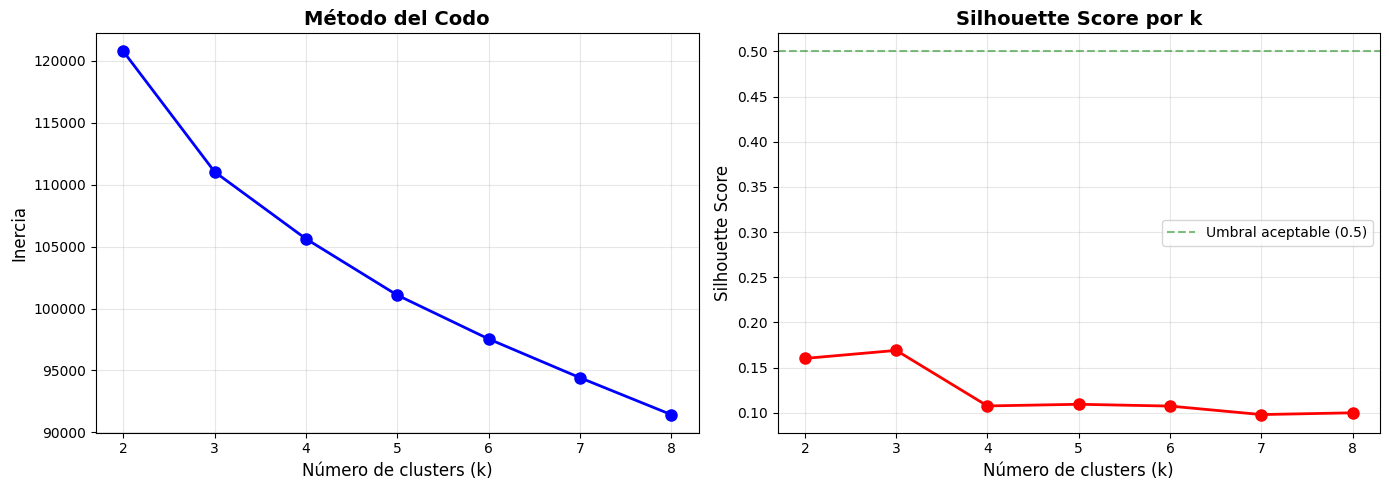

Gráfico guardado en: outputs/metodo_codo_silhouette.png


In [35]:
# Graficar método del codo (inercia)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de clusters (k)', fontsize=12)
ax1.set_ylabel('Inercia', fontsize=12)
ax1.set_title('Método del Codo', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values)

# Graficar silhouette score
ax2.plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score por k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_values)
ax2.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Umbral aceptable (0.5)')
ax2.legend()

plt.tight_layout()
plt.savefig('../outputs/metodo_codo_silhouette.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico guardado en: outputs/metodo_codo_silhouette.png")


In [36]:
# Reducir variables para mejorar clustering
# Eliminamos variables de alta cardinalidad y redundantes

variables_numericas_v2 = ['EDAD CONSUMIDOR', 'HORA']  # Eliminamos MES (poca varianza semestral)

variables_categoricas_v2 = [
    'GENERO CONSUMIDOR',
    'TIPO DE CONSULTA',          # Directa/Indirecta/Informe - MUY IMPORTANTE
    'MOTIVO DE CONSULTA',         # Crisis, Recaída, etc.
    'TRATAMIENTO',                # Antecedentes de tratamiento
    'TIEMPO DE CONSUMO',          # Duración del consumo
    'CONSULTANTE',                # Relación con el consumidor
    'FRANJA_HORARIA',             # Patrón temporal
    'ES_FIN_DE_SEMANA'            # Patrón semanal
]

# ELIMINADAS (razones):
# - GENERO CONSULTANTE: redundante con CONSULTANTE
# - PROVINCIA CONSULTANTE: 24 categorías = mucho ruido
# - MODALIDAD DE CONSULTA: siempre "Consulta a la línea 141"
# - DIA_SEMANA: redundante con ES_FIN_DE_SEMANA
# - MES: poca variabilidad en 6 meses

print("Variables REDUCIDAS para clustering mejorado:")
print(f"Numéricas ({len(variables_numericas_v2)}): {variables_numericas_v2}")
print(f"Categóricas ({len(variables_categoricas_v2)}): {variables_categoricas_v2}")
print(f"Total: {len(variables_numericas_v2) + len(variables_categoricas_v2)} variables")


Variables REDUCIDAS para clustering mejorado:
Numéricas (2): ['EDAD CONSUMIDOR', 'HORA']
Categóricas (8): ['GENERO CONSUMIDOR', 'TIPO DE CONSULTA', 'MOTIVO DE CONSULTA', 'TRATAMIENTO', 'TIEMPO DE CONSUMO', 'CONSULTANTE', 'FRANJA_HORARIA', 'ES_FIN_DE_SEMANA']
Total: 10 variables


In [37]:
# Crear nuevo df_model con variables reducidas
columnas_modelo_v2 = variables_numericas_v2 + variables_categoricas_v2
df_model_v2 = df_efectivas[columnas_modelo_v2].copy()

print(f"Dataset v1: {df_model.shape}")
print(f"Dataset v2: {df_model_v2.shape}")


Dataset v1: (14091, 15)
Dataset v2: (14091, 10)


In [38]:
# Recrear pipeline con variables reducidas
preprocessor_v2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, variables_numericas_v2),
        ('cat', categorical_transformer, variables_categoricas_v2)
    ])

X_transformed_v2 = preprocessor_v2.fit_transform(df_model_v2)

print(f"Features v1 (original): {X_transformed.shape[1]}")
print(f"Features v2 (reducido): {X_transformed_v2.shape[1]}")
print(f"Reducción: {X_transformed.shape[1] - X_transformed_v2.shape[1]} features eliminados")


Features v1 (original): 109
Features v2 (reducido): 67
Reducción: 42 features eliminados


In [39]:
# Recalcular inercia y silhouette con el modelo V2 mejorado
k_values = range(2, 9)
inertias_v2 = []
silhouettes_v2 = []

print("Calculando métricas V2 (modelo mejorado)...")
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_transformed_v2)
    inertias_v2.append(kmeans.inertia_)
    silhouette = silhouette_score(X_transformed_v2, kmeans.labels_)
    silhouettes_v2.append(silhouette)
    print(f"k={k}: Inercia={kmeans.inertia_:.2f}, Silhouette={silhouette:.4f}")

print("\n¡Cálculo V2 completado!")

Calculando métricas V2 (modelo mejorado)...
k=2: Inercia=78175.57, Silhouette=0.2364
k=3: Inercia=68611.28, Silhouette=0.2520
k=4: Inercia=63271.93, Silhouette=0.1861
k=5: Inercia=58545.28, Silhouette=0.1932
k=6: Inercia=55191.24, Silhouette=0.1942
k=7: Inercia=52018.24, Silhouette=0.1989
k=8: Inercia=49884.97, Silhouette=0.2015

¡Cálculo V2 completado!


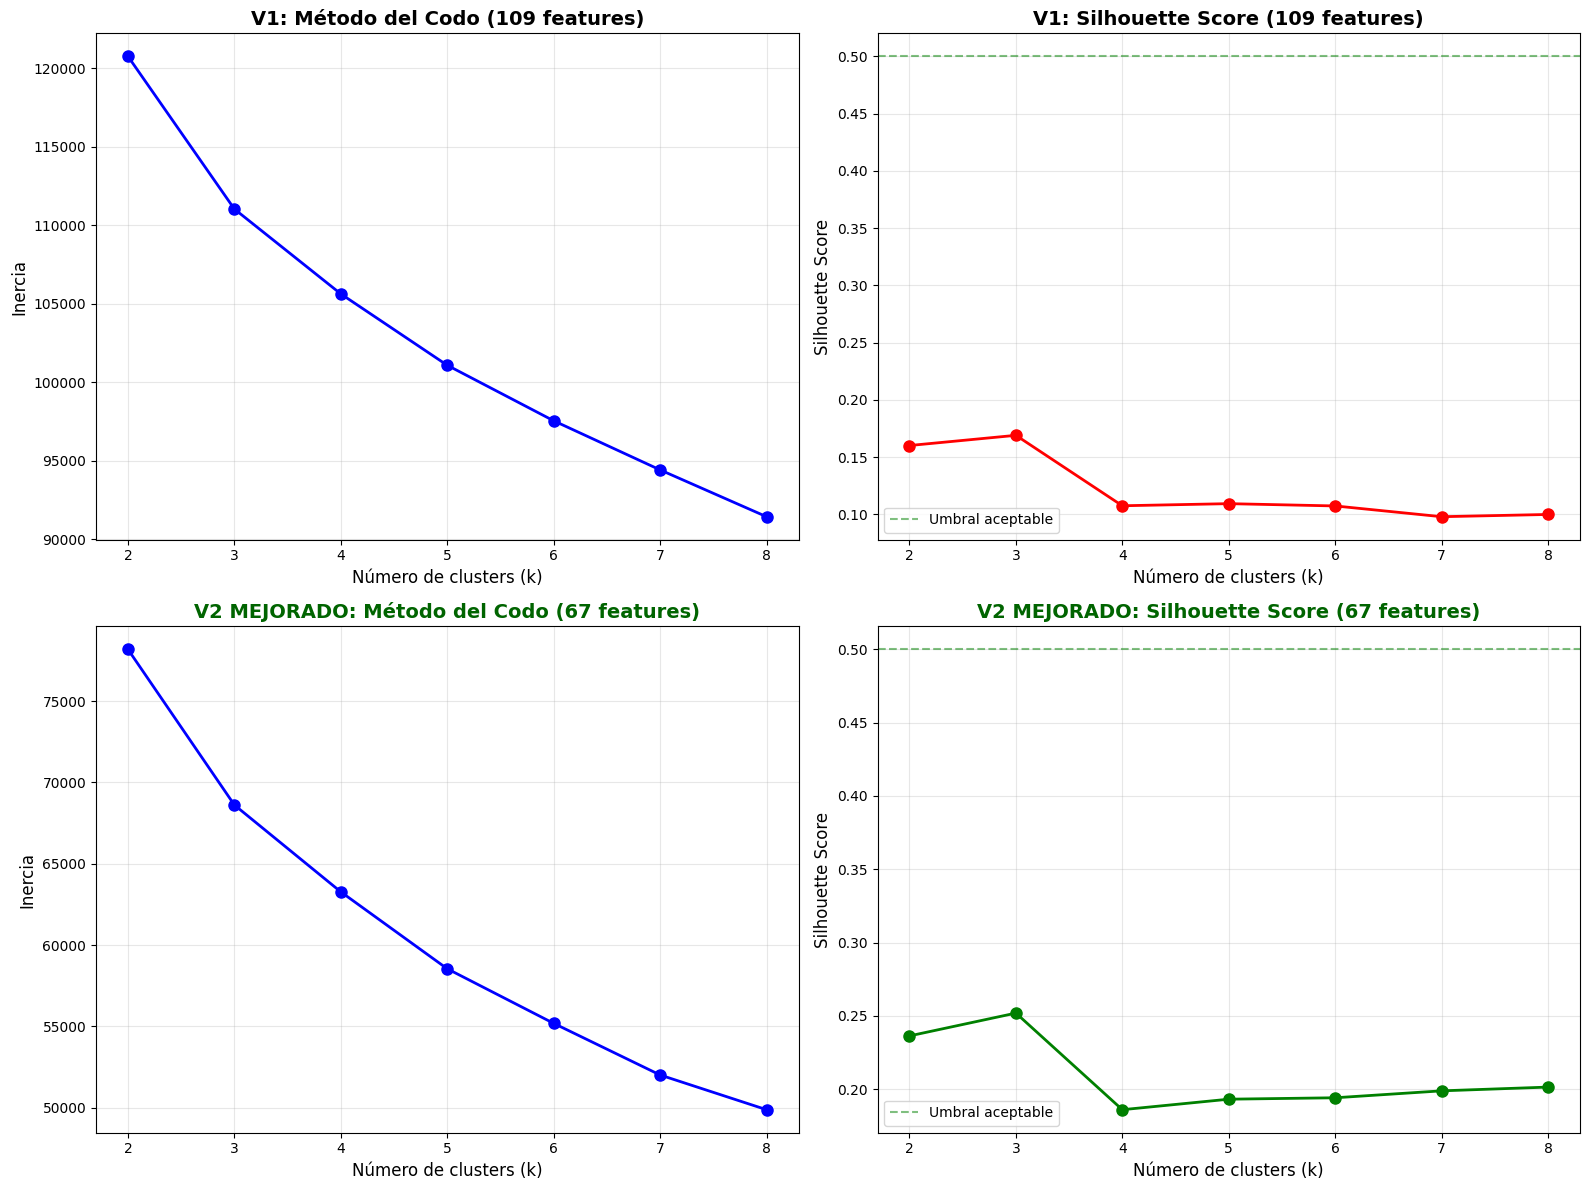

Gráfico comparativo guardado en: outputs/comparacion_v1_v2_clustering.png


In [40]:
# Graficar comparación V1 vs V2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# V1 - Inercia
ax1.plot(k_values, inertias, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Número de clusters (k)', fontsize=12)
ax1.set_ylabel('Inercia', fontsize=12)
ax1.set_title('V1: Método del Codo (109 features)', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(k_values)

# V1 - Silhouette
ax2.plot(k_values, silhouettes, 'ro-', linewidth=2, markersize=8)
ax2.set_xlabel('Número de clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('V1: Silhouette Score (109 features)', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.set_xticks(k_values)
ax2.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Umbral aceptable')
ax2.legend()

# V2 - Inercia
ax3.plot(k_values, inertias_v2, 'bo-', linewidth=2, markersize=8)
ax3.set_xlabel('Número de clusters (k)', fontsize=12)
ax3.set_ylabel('Inercia', fontsize=12)
ax3.set_title('V2 MEJORADO: Método del Codo (67 features)', fontsize=14, fontweight='bold', color='darkgreen')
ax3.grid(True, alpha=0.3)
ax3.set_xticks(k_values)

# V2 - Silhouette
ax4.plot(k_values, silhouettes_v2, 'go-', linewidth=2, markersize=8)
ax4.set_xlabel('Número de clusters (k)', fontsize=12)
ax4.set_ylabel('Silhouette Score', fontsize=12)
ax4.set_title('V2 MEJORADO: Silhouette Score (67 features)', fontsize=14, fontweight='bold', color='darkgreen')
ax4.grid(True, alpha=0.3)
ax4.set_xticks(k_values)
ax4.axhline(y=0.5, color='green', linestyle='--', alpha=0.5, label='Umbral aceptable')
ax4.legend()

plt.tight_layout()
plt.savefig('../outputs/comparacion_v1_v2_clustering.png', dpi=300, bbox_inches='tight')
plt.show()

print("Gráfico comparativo guardado en: outputs/comparacion_v1_v2_clustering.png")

In [41]:
# Entrenar modelo final con k=3
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_final.fit(X_transformed_v2)

# Asignar etiquetas al dataset
df_model_v2['cluster'] = kmeans_final.labels_

print("Modelo KMeans entrenado con k=3")
print(f"Inercia final: {kmeans_final.inertia_:.2f}")
print(f"Silhouette Score final: {silhouette_score(X_transformed_v2, kmeans_final.labels_):.4f}")
print("\nDistribución de clusters:")
print(df_model_v2['cluster'].value_counts().sort_index())


Modelo KMeans entrenado con k=3
Inercia final: 68611.28
Silhouette Score final: 0.2520

Distribución de clusters:
cluster
0    5782
1    3177
2    5132
Name: count, dtype: int64


In [42]:
# Agregar cluster también al dataframe original (df_efectivas)
df_efectivas['cluster'] = df_model_v2['cluster']

# Verificar
print("Cluster agregado a df_efectivas")
print(f"\nPrimeras 10 filas con cluster asignado:")
print(df_efectivas[['TIPO DE CONSULTA', 'CONSULTANTE', 'GENERO CONSUMIDOR', 
                     'MOTIVO DE CONSULTA', 'TRATAMIENTO', 'cluster']].head(10))


Cluster agregado a df_efectivas

Primeras 10 filas con cluster asignado:
      TIPO DE CONSULTA CONSULTANTE GENERO CONSUMIDOR  \
0     Consulta Directa  Consumidor             Varón   
2     Consulta Directa  Consumidor             Varón   
3              Informe  Consumidor               NaN   
4     Consulta Directa  Consumidor             Varón   
5   Consulta Indirecta       Amigo             Varón   
15             Informe  Consumidor               NaN   
16  Consulta Indirecta       Madre             Varón   
17    Consulta Directa  Consumidor             Varón   
18  Consulta Indirecta       Madre             Varón   
22    Consulta Directa  Consumidor             Varón   

                MOTIVO DE CONSULTA                 TRATAMIENTO  cluster  
0   Crisis en situación de consumo                Nunca estuvo        2  
2   Crisis en situación de consumo    Tratamiento psiquiátrico        1  
3                              NaN                         NaN        0  
4   Crisis en 

In [43]:
# Resumen rápido por cluster
print("Resumen por cluster:\n")
for cluster_id in range(3):
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    print(f"{'='*60}")
    print(f"CLUSTER {cluster_id} - Tamaño: {len(cluster_data)} ({len(cluster_data)/len(df_model_v2)*100:.1f}%)")
    print(f"{'='*60}")
    print(f"Edad media: {cluster_data['EDAD CONSUMIDOR'].mean():.1f} años")
    print(f"Tipo de consulta más común: {cluster_data['TIPO DE CONSULTA'].mode()[0]}")
    print(f"Consultante más común: {cluster_data['CONSULTANTE'].mode()[0]}")
    print()


Resumen por cluster:

CLUSTER 0 - Tamaño: 5782 (41.0%)
Edad media: <NA> años
Tipo de consulta más común: Informe
Consultante más común: Consumidor

CLUSTER 1 - Tamaño: 3177 (22.5%)
Edad media: 42.5 años
Tipo de consulta más común: Consulta Indirecta
Consultante más común: Consumidor

CLUSTER 2 - Tamaño: 5132 (36.4%)
Edad media: 26.0 años
Tipo de consulta más común: Consulta Indirecta
Consultante más común: Madre



In [44]:
# Tabla de conteos y proporciones por cluster
print("="*80)
print("DISTRIBUCIÓN GENERAL POR CLUSTER")
print("="*80)

cluster_summary = pd.DataFrame({
    'Tamaño': df_model_v2['cluster'].value_counts().sort_index(),
    'Porcentaje': (df_model_v2['cluster'].value_counts().sort_index() / len(df_model_v2) * 100).round(2)
})
cluster_summary['Porcentaje'] = cluster_summary['Porcentaje'].astype(str) + '%'
print(cluster_summary)
print()


DISTRIBUCIÓN GENERAL POR CLUSTER
         Tamaño Porcentaje
cluster                   
0          5782     41.03%
1          3177     22.55%
2          5132     36.42%



In [45]:
# Perfilado detallado por cluster - Variables categóricas clave
variables_perfilar = ['TIPO DE CONSULTA', 'CONSULTANTE', 'GENERO CONSUMIDOR', 
                      'MOTIVO DE CONSULTA', 'TRATAMIENTO', 'TIEMPO DE CONSUMO', 'FRANJA_HORARIA']

for cluster_id in range(3):
    print("\n" + "="*80)
    print(f"PERFIL DETALLADO - CLUSTER {cluster_id}")
    print("="*80)
    
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    
    for var in variables_perfilar:
        print(f"\n{var}:")
        top_3 = cluster_data[var].value_counts(dropna=False).head(3)
        for idx, (categoria, count) in enumerate(top_3.items(), 1):
            pct = (count / len(cluster_data) * 100)
            print(f"  {idx}. {categoria}: {count} ({pct:.1f}%)")
    
    print("\n" + "-"*80)


PERFIL DETALLADO - CLUSTER 0

TIPO DE CONSULTA:
  1. Informe: 5782 (100.0%)

CONSULTANTE:
  1. Consumidor: 1503 (26.0%)
  2. Madre: 1086 (18.8%)
  3. Otro: 718 (12.4%)

GENERO CONSUMIDOR:
  1. nan: 5782 (100.0%)

MOTIVO DE CONSULTA:
  1. nan: 5782 (100.0%)

TRATAMIENTO:
  1. nan: 5782 (100.0%)

TIEMPO DE CONSUMO:
  1. nan: 5782 (100.0%)

FRANJA_HORARIA:
  1. Tarde: 2346 (40.6%)
  2. Mañana: 1595 (27.6%)
  3. Noche: 1576 (27.3%)

--------------------------------------------------------------------------------

PERFIL DETALLADO - CLUSTER 1

TIPO DE CONSULTA:
  1. Consulta Indirecta: 1855 (58.4%)
  2. Consulta Directa: 1322 (41.6%)

CONSULTANTE:
  1. Consumidor: 1322 (41.6%)
  2. Hermano: 451 (14.2%)
  3. Madre: 427 (13.4%)

GENERO CONSUMIDOR:
  1. Varón: 2573 (81.0%)
  2. Mujer: 560 (17.6%)
  3. Sin definir: 39 (1.2%)

MOTIVO DE CONSULTA:
  1. Transtornos crónicos: 814 (25.6%)
  2. Crisis en situación de consumo: 588 (18.5%)
  3. Inquietudes por el tipo de vida: 468 (14.7%)

TRATAMIENTO

In [46]:
# Análisis de edad y hora por cluster
print("="*80)
print("ANÁLISIS NUMÉRICO POR CLUSTER")
print("="*80)

for cluster_id in range(3):
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    print(f"\nCLUSTER {cluster_id}:")
    print(f"  Edad - Media: {cluster_data['EDAD CONSUMIDOR'].mean():.1f}, Mediana: {cluster_data['EDAD CONSUMIDOR'].median()}")
    print(f"  Hora - Media: {cluster_data['HORA'].mean():.1f}, Mediana: {cluster_data['HORA'].median():.1f}")
    print(f"  Fin de semana: {(cluster_data['ES_FIN_DE_SEMANA'] == True).sum()} ({(cluster_data['ES_FIN_DE_SEMANA'] == True).sum()/len(cluster_data)*100:.1f}%)")


ANÁLISIS NUMÉRICO POR CLUSTER

CLUSTER 0:
  Edad - Media: <NA>, Mediana: <NA>
  Hora - Media: 14.0, Mediana: 14.0
  Fin de semana: 984 (17.0%)

CLUSTER 1:
  Edad - Media: 42.5, Mediana: 40.0
  Hora - Media: 13.6, Mediana: 14.0
  Fin de semana: 635 (20.0%)

CLUSTER 2:
  Edad - Media: 26.0, Mediana: 26.0
  Hora - Media: 14.0, Mediana: 14.0
  Fin de semana: 878 (17.1%)


c:\Programming\tp-mineria-141\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [47]:
# Configuración de estilo para gráficos profesionales
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Paleta de colores para los 3 clusters
colores_clusters = ['#3498db', '#e74c3c', '#2ecc71']  # Azul, Rojo, Verde

print("Configuración de visualización lista")
print(f"Colores por cluster: {colores_clusters}")


Configuración de visualización lista
Colores por cluster: ['#3498db', '#e74c3c', '#2ecc71']


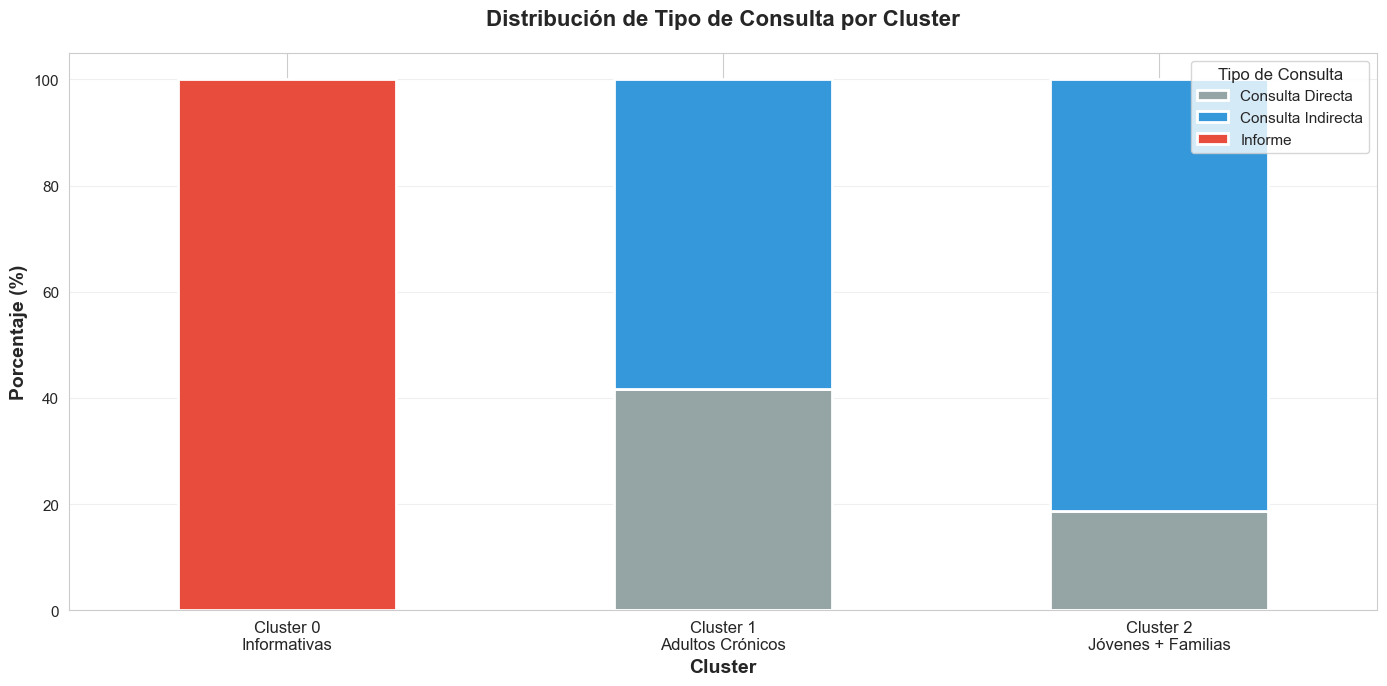

✓ Gráfico guardado: outputs/grafico_tipo_consulta_cluster.png


In [48]:
# Gráfico 1: Distribución de TIPO DE CONSULTA por cluster (barras apiladas)
fig, ax = plt.subplots(figsize=(14, 7))

tipo_consulta_cluster = pd.crosstab(
    df_model_v2['cluster'], 
    df_model_v2['TIPO DE CONSULTA'], 
    normalize='index'
) * 100

tipo_consulta_cluster.plot(
    kind='bar', 
    stacked=True, 
    ax=ax,
    color=['#95a5a6', '#3498db', '#e74c3c'],
    edgecolor='white',
    linewidth=2
)

ax.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribución de Tipo de Consulta por Cluster', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(['Cluster 0\nInformativas', 'Cluster 1\nAdultos Crónicos', 'Cluster 2\nJóvenes + Familias'], 
                   rotation=0, fontsize=12)
ax.legend(title='Tipo de Consulta', fontsize=11, title_fontsize=12, loc='upper right')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/grafico_tipo_consulta_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_tipo_consulta_cluster.png")


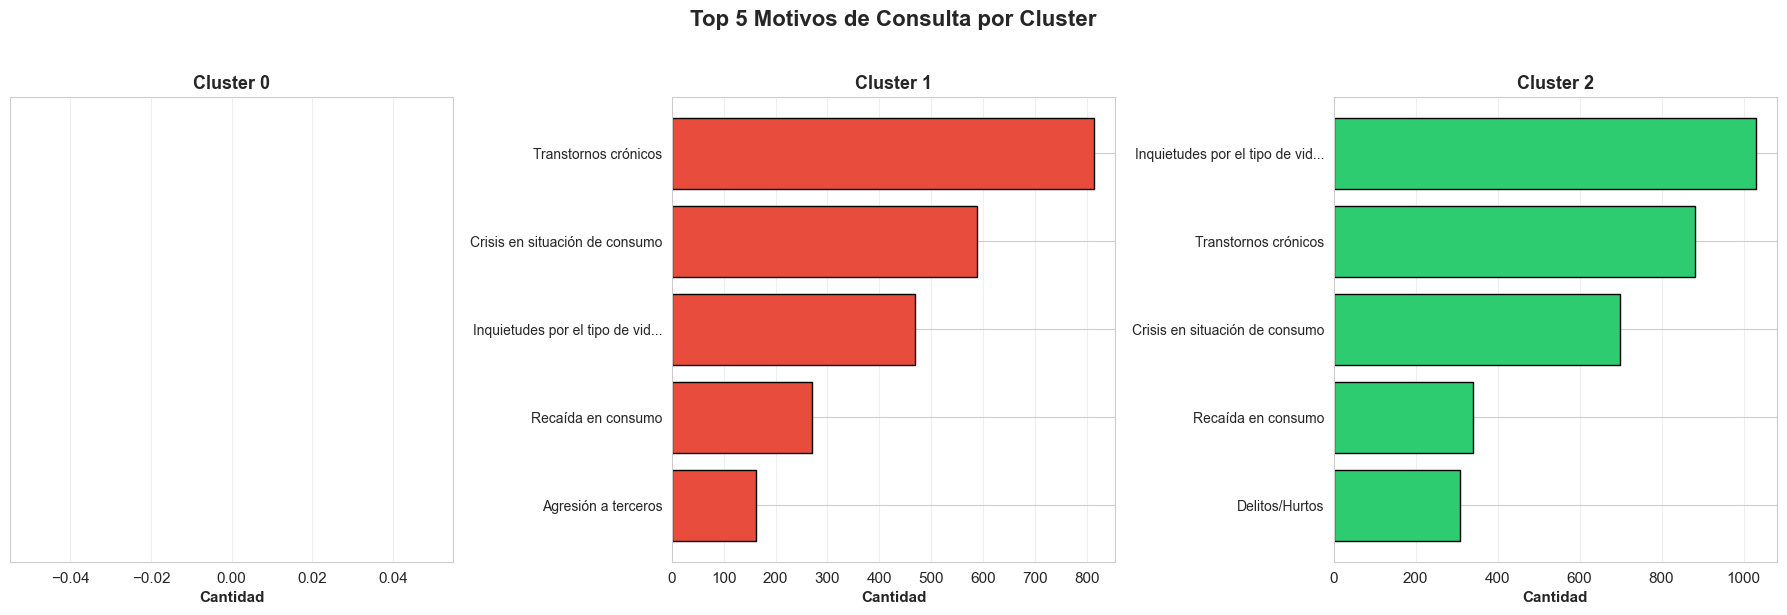

✓ Gráfico guardado: outputs/grafico_motivos_cluster.png


In [49]:
# Gráfico 2: Top 5 MOTIVOS DE CONSULTA por cluster
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, cluster_id in enumerate(range(3)):
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    top_motivos = cluster_data['MOTIVO DE CONSULTA'].value_counts().head(5)
    
    axes[idx].barh(range(len(top_motivos)), top_motivos.values, color=colores_clusters[idx], edgecolor='black')
    axes[idx].set_yticks(range(len(top_motivos)))
    axes[idx].set_yticklabels([str(m)[:30] + '...' if len(str(m)) > 30 else str(m) for m in top_motivos.index], fontsize=10)
    axes[idx].set_xlabel('Cantidad', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Cluster {cluster_id}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()

fig.suptitle('Top 5 Motivos de Consulta por Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/grafico_motivos_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_motivos_cluster.png")


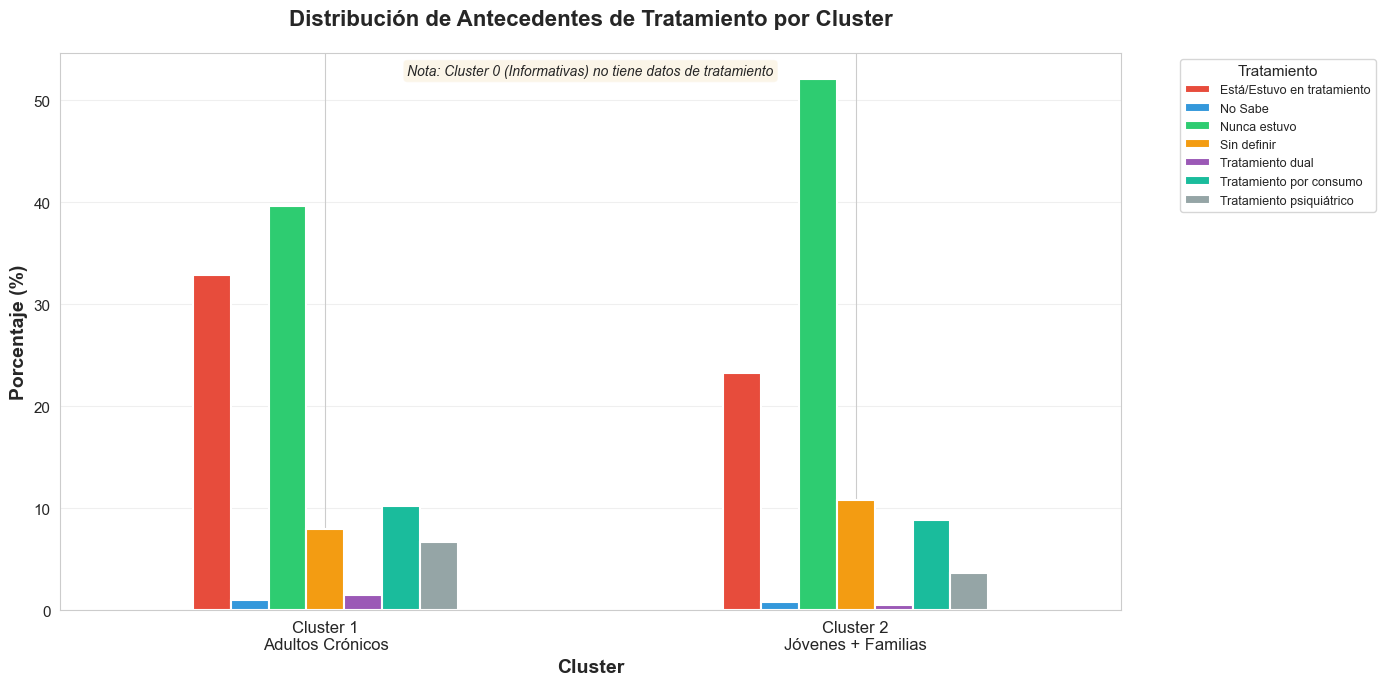

✓ Gráfico guardado: outputs/grafico_tratamiento_cluster.png


In [52]:
# Gráfico 3: Distribución de TRATAMIENTO por cluster
fig, ax = plt.subplots(figsize=(14, 7))

tratamiento_cluster = pd.crosstab(
    df_model_v2['cluster'], 
    df_model_v2['TRATAMIENTO'], 
    normalize='index'
) * 100

tratamiento_cluster.plot(
    kind='bar', 
    ax=ax,
    color=['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#95a5a6'],
    edgecolor='white',
    linewidth=1.5
)

ax.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribución de Antecedentes de Tratamiento por Cluster', fontsize=16, fontweight='bold', pad=20)

# Corregido: solo clusters 1 y 2 tienen datos de tratamiento
ax.set_xticklabels(['Cluster 1\nAdultos Crónicos', 'Cluster 2\nJóvenes + Familias'], 
                   rotation=0, fontsize=12)
ax.legend(title='Tratamiento', fontsize=9, title_fontsize=11, bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(axis='y', alpha=0.3)

# Agregar nota sobre Cluster 0
ax.text(0.5, 0.98, 'Nota: Cluster 0 (Informativas) no tiene datos de tratamiento', 
        transform=ax.transAxes, fontsize=10, style='italic',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
        horizontalalignment='center', verticalalignment='top')

plt.tight_layout()
plt.savefig('../outputs/grafico_tratamiento_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_tratamiento_cluster.png")


C:\Users\natig\AppData\Local\Temp\ipykernel_4020\395886021.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\natig\AppData\Local\Temp\ipykernel_4020\395886021.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Cluster 1\nAdultos Crónicos\n(Media: 42.5 años)',


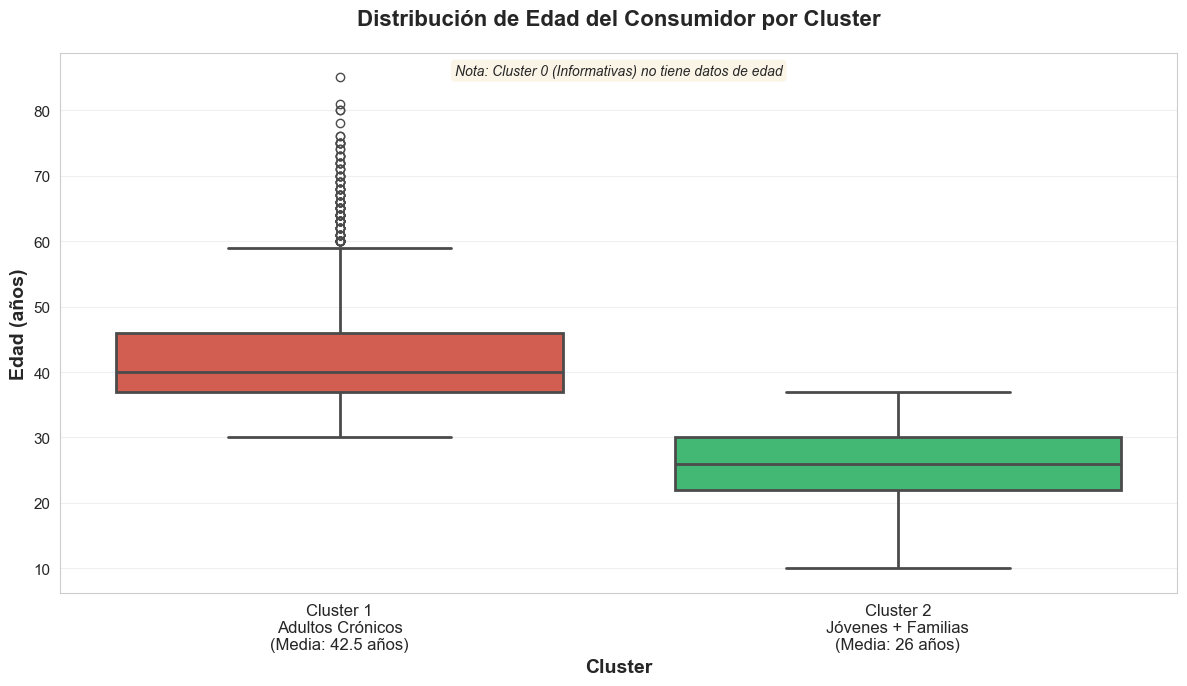

✓ Gráfico guardado: outputs/grafico_edad_cluster.png


In [53]:
# Gráfico 4: Boxplot de EDAD por cluster
fig, ax = plt.subplots(figsize=(12, 7))

# Filtrar solo clusters con edades (1 y 2)
df_con_edad = df_model_v2[df_model_v2['cluster'].isin([1, 2])].copy()

sns.boxplot(
    data=df_con_edad, 
    x='cluster', 
    y='EDAD CONSUMIDOR',
    palette=[colores_clusters[1], colores_clusters[2]],
    ax=ax,
    linewidth=2
)

ax.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Edad (años)', fontsize=14, fontweight='bold')
ax.set_title('Distribución de Edad del Consumidor por Cluster', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(['Cluster 1\nAdultos Crónicos\n(Media: 42.5 años)', 
                    'Cluster 2\nJóvenes + Familias\n(Media: 26 años)'], 
                   fontsize=12)
ax.grid(axis='y', alpha=0.3)

# Agregar nota sobre Cluster 0
ax.text(0.5, 0.98, 'Nota: Cluster 0 (Informativas) no tiene datos de edad', 
        transform=ax.transAxes, fontsize=10, style='italic',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3),
        horizontalalignment='center', verticalalignment='top')

plt.tight_layout()
plt.savefig('../outputs/grafico_edad_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_edad_cluster.png")


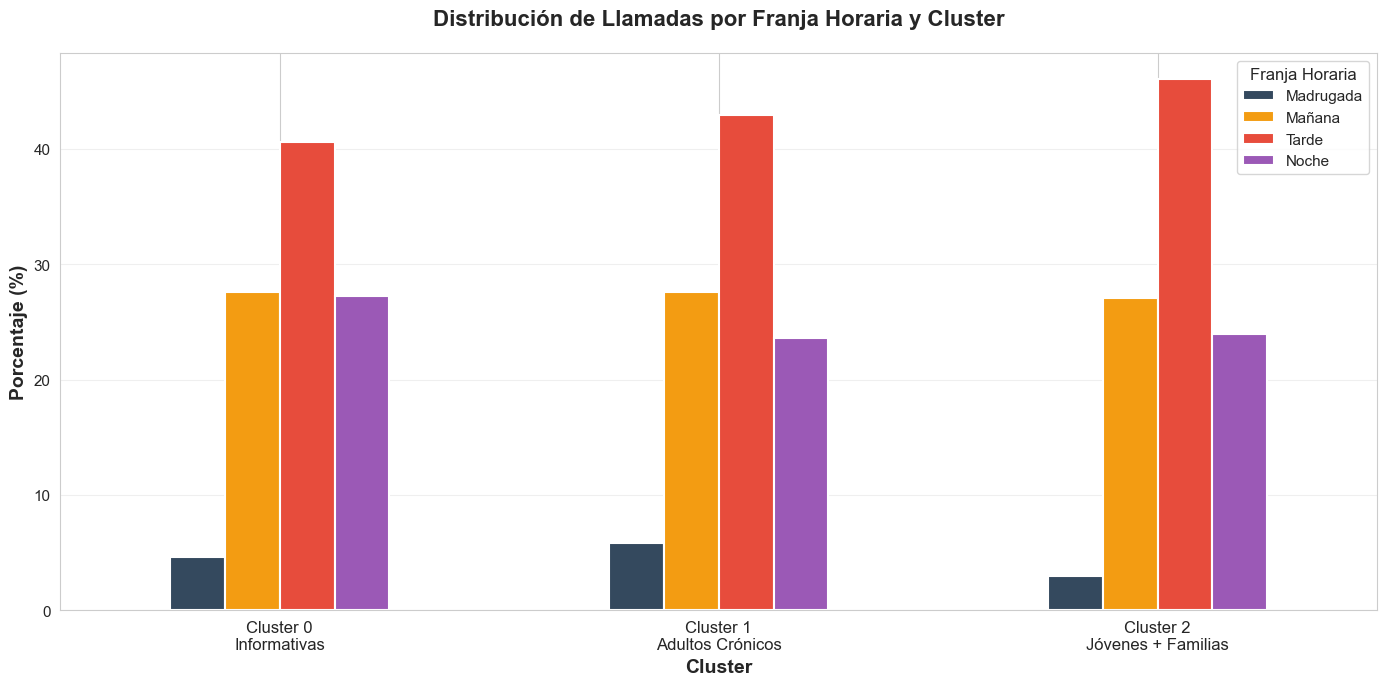

✓ Gráfico guardado: outputs/grafico_franja_horaria_cluster.png


In [54]:
# Gráfico 5: Distribución de FRANJA_HORARIA por cluster
fig, ax = plt.subplots(figsize=(14, 7))

franja_cluster = pd.crosstab(
    df_model_v2['cluster'], 
    df_model_v2['FRANJA_HORARIA'], 
    normalize='index'
) * 100

# Ordenar franjas cronológicamente
orden_franjas = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
franja_cluster = franja_cluster[orden_franjas]

franja_cluster.plot(
    kind='bar', 
    ax=ax,
    color=['#34495e', '#f39c12', '#e74c3c', '#9b59b6'],
    edgecolor='white',
    linewidth=1.5
)

ax.set_xlabel('Cluster', fontsize=14, fontweight='bold')
ax.set_ylabel('Porcentaje (%)', fontsize=14, fontweight='bold')
ax.set_title('Distribución de Llamadas por Franja Horaria y Cluster', fontsize=16, fontweight='bold', pad=20)
ax.set_xticklabels(['Cluster 0\nInformativas', 'Cluster 1\nAdultos Crónicos', 'Cluster 2\nJóvenes + Familias'], 
                   rotation=0, fontsize=12)
ax.legend(title='Franja Horaria', fontsize=11, title_fontsize=12)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../outputs/grafico_franja_horaria_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_franja_horaria_cluster.png")


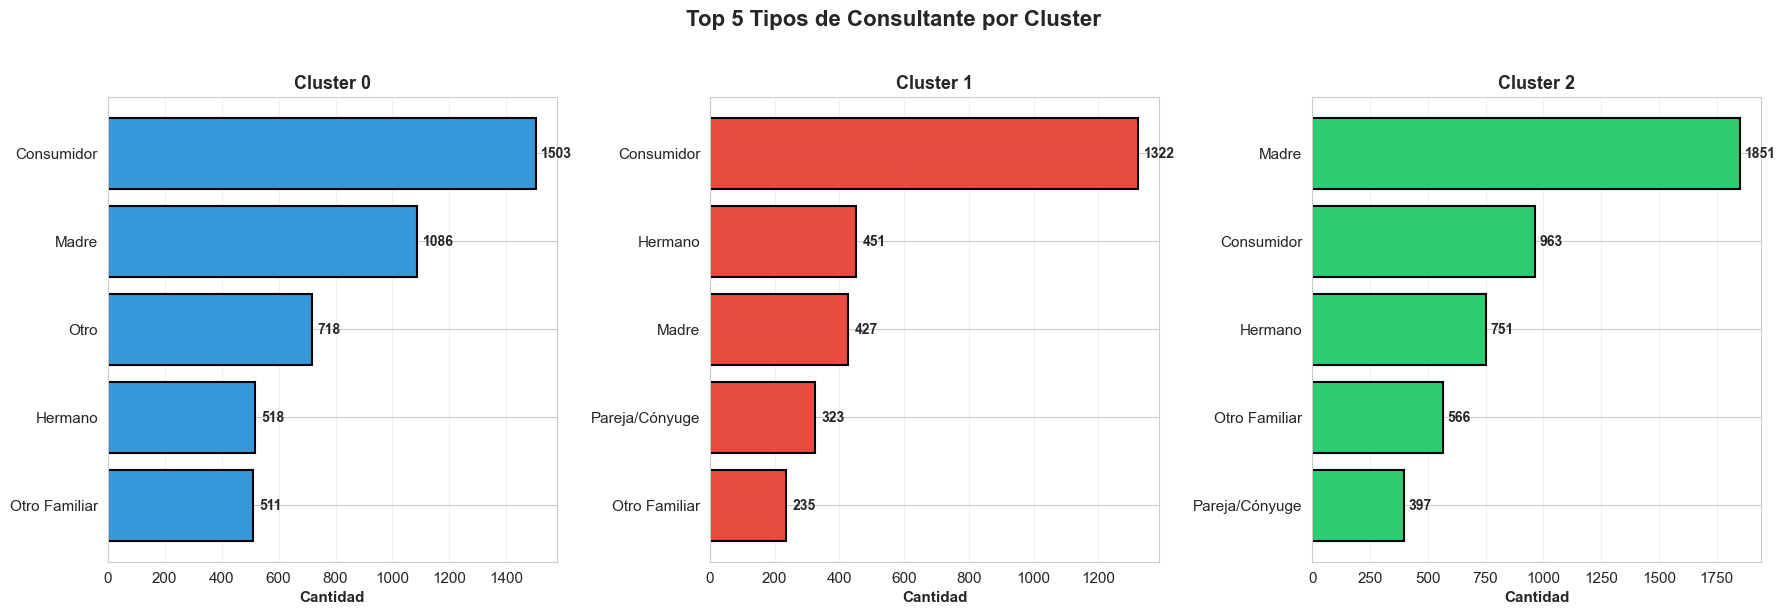

✓ Gráfico guardado: outputs/grafico_consultante_cluster.png


In [55]:
# Gráfico 6: Distribución de CONSULTANTE por cluster (top 5)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, cluster_id in enumerate(range(3)):
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    top_consultante = cluster_data['CONSULTANTE'].value_counts().head(5)
    
    axes[idx].barh(range(len(top_consultante)), top_consultante.values, 
                   color=colores_clusters[idx], edgecolor='black', linewidth=1.5)
    axes[idx].set_yticks(range(len(top_consultante)))
    axes[idx].set_yticklabels(top_consultante.index, fontsize=11)
    axes[idx].set_xlabel('Cantidad', fontsize=11, fontweight='bold')
    axes[idx].set_title(f'Cluster {cluster_id}', fontsize=13, fontweight='bold')
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()
    
    # Agregar valores en las barras
    for i, v in enumerate(top_consultante.values):
        axes[idx].text(v + 20, i, str(v), va='center', fontsize=10, fontweight='bold')

fig.suptitle('Top 5 Tipos de Consultante por Cluster', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../outputs/grafico_consultante_cluster.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_consultante_cluster.png")


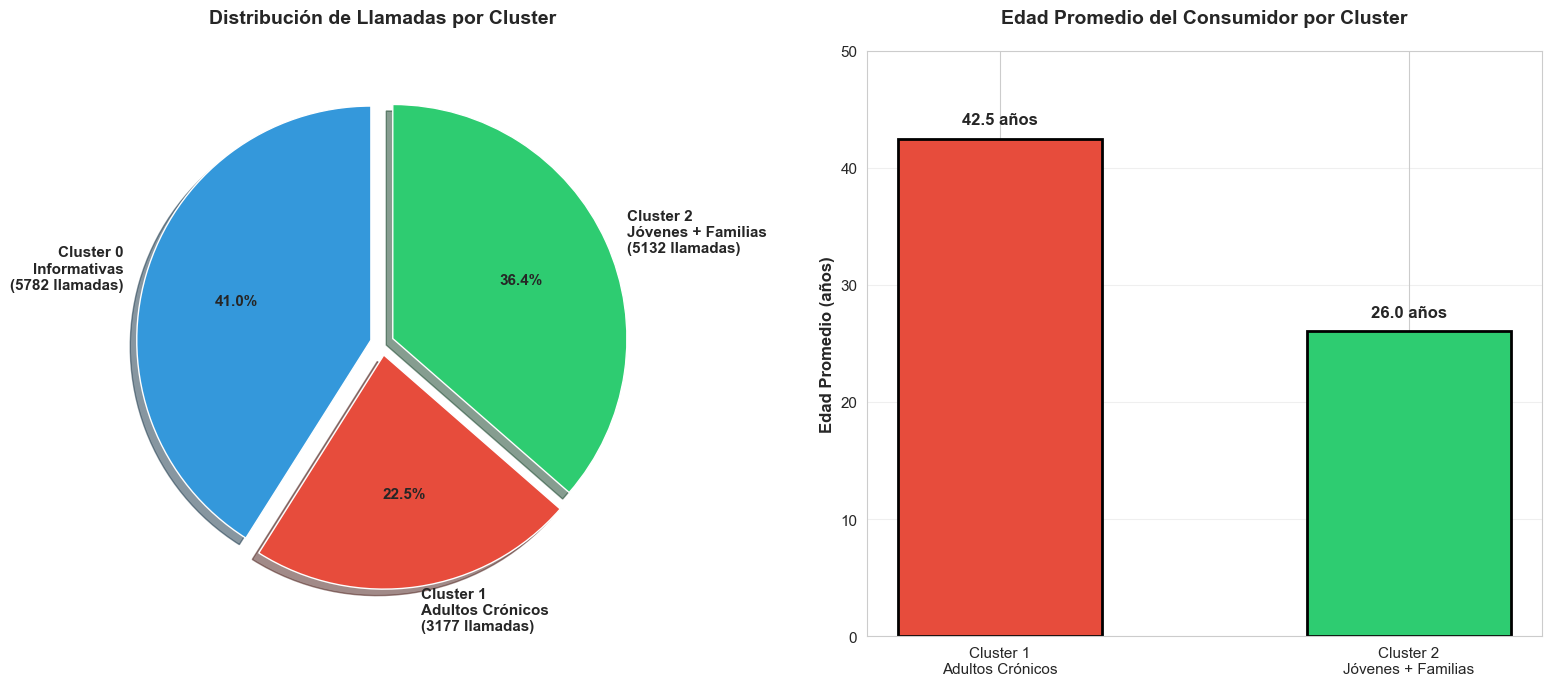

✓ Gráfico guardado: outputs/grafico_resumen_clusters.png


In [56]:
# Gráfico 7: Resumen visual - Tamaño y características de clusters
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Subplot 1: Tamaño de clusters (pie chart)
cluster_sizes = df_model_v2['cluster'].value_counts().sort_index()
labels_pie = [
    f'Cluster 0\nInformativas\n({cluster_sizes[0]} llamadas)',
    f'Cluster 1\nAdultos Crónicos\n({cluster_sizes[1]} llamadas)',
    f'Cluster 2\nJóvenes + Familias\n({cluster_sizes[2]} llamadas)'
]

ax1.pie(cluster_sizes.values, labels=labels_pie, autopct='%1.1f%%', 
        colors=colores_clusters, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'},
        explode=(0.05, 0.05, 0.05), shadow=True)
ax1.set_title('Distribución de Llamadas por Cluster', fontsize=14, fontweight='bold', pad=20)

# Subplot 2: Edad promedio por cluster (solo 1 y 2)
edades_promedio = [
    df_model_v2[df_model_v2['cluster'] == 1]['EDAD CONSUMIDOR'].mean(),
    df_model_v2[df_model_v2['cluster'] == 2]['EDAD CONSUMIDOR'].mean()
]
cluster_nombres = ['Cluster 1\nAdultos Crónicos', 'Cluster 2\nJóvenes + Familias']

bars = ax2.bar(cluster_nombres, edades_promedio, color=[colores_clusters[1], colores_clusters[2]], 
               edgecolor='black', linewidth=2, width=0.5)
ax2.set_ylabel('Edad Promedio (años)', fontsize=12, fontweight='bold')
ax2.set_title('Edad Promedio del Consumidor por Cluster', fontsize=14, fontweight='bold', pad=20)
ax2.grid(axis='y', alpha=0.3)
ax2.set_ylim(0, 50)

# Agregar valores en las barras
for bar, edad in zip(bars, edades_promedio):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{edad:.1f} años', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/grafico_resumen_clusters.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_resumen_clusters.png")


In [57]:
# Crear carpeta outputs/tablas si no existe
import os
os.makedirs('../outputs/tablas', exist_ok=True)
print("✓ Carpeta outputs/tablas creada/verificada")


✓ Carpeta outputs/tablas creada/verificada


In [58]:
# Tabla 1: Resumen general por cluster
resumen_clusters = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Nombre': ['Consultas Informativas', 'Adultos Crónicos', 'Jóvenes + Familias'],
    'Tamaño': [
        len(df_model_v2[df_model_v2['cluster'] == 0]),
        len(df_model_v2[df_model_v2['cluster'] == 1]),
        len(df_model_v2[df_model_v2['cluster'] == 2])
    ],
    'Porcentaje': [
        f"{len(df_model_v2[df_model_v2['cluster'] == 0])/len(df_model_v2)*100:.1f}%",
        f"{len(df_model_v2[df_model_v2['cluster'] == 1])/len(df_model_v2)*100:.1f}%",
        f"{len(df_model_v2[df_model_v2['cluster'] == 2])/len(df_model_v2)*100:.1f}%"
    ],
    'Edad_Media': [
        'N/A',
        f"{df_model_v2[df_model_v2['cluster'] == 1]['EDAD CONSUMIDOR'].mean():.1f}",
        f"{df_model_v2[df_model_v2['cluster'] == 2]['EDAD CONSUMIDOR'].mean():.1f}"
    ],
    'Edad_Mediana': [
        'N/A',
        f"{df_model_v2[df_model_v2['cluster'] == 1]['EDAD CONSUMIDOR'].median()}",
        f"{df_model_v2[df_model_v2['cluster'] == 2]['EDAD CONSUMIDOR'].median()}"
    ]
})

print("Resumen general por cluster:")
print(resumen_clusters)
print("\n")

# Guardar CSV
resumen_clusters.to_csv('../outputs/tablas/resumen_clusters.csv', index=False, encoding='utf-8-sig')
print("✓ Tabla guardada: outputs/tablas/resumen_clusters.csv")


Resumen general por cluster:
   Cluster                  Nombre  Tamaño Porcentaje Edad_Media Edad_Mediana
0        0  Consultas Informativas    5782      41.0%        N/A          N/A
1        1        Adultos Crónicos    3177      22.5%       42.5         40.0
2        2      Jóvenes + Familias    5132      36.4%       26.0         26.0


✓ Tabla guardada: outputs/tablas/resumen_clusters.csv


In [59]:
# Tabla 2: Top 3 categorías por variable cualitativa por cluster
perfil_detallado = []

variables_clave = ['TIPO DE CONSULTA', 'CONSULTANTE', 'MOTIVO DE CONSULTA', 'TRATAMIENTO', 'FRANJA_HORARIA']

for cluster_id in range(3):
    cluster_data = df_model_v2[df_model_v2['cluster'] == cluster_id]
    
    for var in variables_clave:
        top_3 = cluster_data[var].value_counts(dropna=False).head(3)
        
        for rank, (categoria, count) in enumerate(top_3.items(), 1):
            perfil_detallado.append({
                'Cluster': cluster_id,
                'Variable': var,
                'Ranking': rank,
                'Categoría': str(categoria),
                'Cantidad': count,
                'Porcentaje': f"{count/len(cluster_data)*100:.1f}%"
            })

df_perfil = pd.DataFrame(perfil_detallado)

print("Primeras 20 filas del perfil detallado:")
print(df_perfil.head(20))
print(f"\nTotal de filas: {len(df_perfil)}")

# Guardar CSV
df_perfil.to_csv('../outputs/tablas/perfil_detallado_clusters.csv', index=False, encoding='utf-8-sig')
print("\n✓ Tabla guardada: outputs/tablas/perfil_detallado_clusters.csv")


Primeras 20 filas del perfil detallado:
    Cluster            Variable  Ranking                        Categoría  \
0         0    TIPO DE CONSULTA        1                          Informe   
1         0         CONSULTANTE        1                       Consumidor   
2         0         CONSULTANTE        2                            Madre   
3         0         CONSULTANTE        3                             Otro   
4         0  MOTIVO DE CONSULTA        1                              nan   
5         0         TRATAMIENTO        1                              nan   
6         0      FRANJA_HORARIA        1                            Tarde   
7         0      FRANJA_HORARIA        2                           Mañana   
8         0      FRANJA_HORARIA        3                            Noche   
9         1    TIPO DE CONSULTA        1               Consulta Indirecta   
10        1    TIPO DE CONSULTA        2                 Consulta Directa   
11        1         CONSULTANTE     

In [60]:
# Narrativa y conclusiones por cluster
print("="*80)
print("NARRATIVA Y CONCLUSIONES - CLUSTERS IDENTIFICADOS")
print("="*80)

print("\n🔹 CLUSTER 0 - CONSULTAS INFORMATIVAS (41.0% - 5,782 llamadas)")
print("-" * 80)
print("PERFIL:")
print("  • 100% llamadas tipo 'Informe' - no refieren a caso específico de consumo")
print("  • Sin datos demográficos del consumidor (edad, género, motivo)")
print("  • Consultantes: Consumidor (26%), Madre (19%), Otros (12%)")
print("  • Horario: Principalmente tarde (40%), seguido de mañana (28%)")
print("\nNECESIDADES:")
print("  • Información general sobre tratamientos, centros de atención")
print("  • Orientación sobre cómo actuar ante situaciones de consumo")
print("  • Guías sobre prevención y primeros pasos")
print("\nRECOMENDACIONES:")
print("  • Crear material educativo digital (FAQs, guías descargables)")
print("  • Implementar chatbot para consultas frecuentes")
print("  • Derivación automática a recursos según región")
print("  • Campañas de difusión sobre servicios disponibles")

print("\n" + "="*80)
print("\n🔹 CLUSTER 1 - CONSUMIDORES ADULTOS CRÓNICOS (22.5% - 3,177 llamadas)")
print("-" * 80)
print("PERFIL:")
print("  • Edad promedio: 42.5 años (mediana: 40 años)")
print("  • Ellos mismos llaman (Consumidor = principal consultante)")
print("  • Tiempo de consumo: >10 años en su mayoría")
print("  • Antecedentes: 32% ya estuvo en tratamiento, 37% nunca estuvo")
print("  • Motivos: Trastornos crónicos (24%), Crisis (17%), Recaídas")
print("\nNECESIDADES:")
print("  • Atención a recaídas y reinserción terapéutica")
print("  • Contención en crisis prolongadas")
print("  • Seguimiento de casos crónicos con comorbilidades")
print("\nRECOMENDACIONES:")
print("  • Programas de seguimiento prolongado y acompañamiento")
print("  • Grupos de apoyo para prevención de recaídas")
print("  • Articulación con servicios de salud mental")
print("  • Estrategias de adherencia a tratamientos de largo plazo")

print("\n" + "="*80)
print("\n🔹 CLUSTER 2 - JÓVENES CON FAMILIAS PREOCUPADAS (36.4% - 5,132 llamadas)")
print("-" * 80)
print("PERFIL:")
print("  • Edad promedio: 26.0 años (mediana: 26 años)")
print("  • MADRES son las principales consultantes (33% del cluster)")
print("  • Consultas mayormente indirectas (80%)")
print("  • Tratamiento: 52% nunca estuvo - primeros contactos")
print("  • Motivos: Inquietudes por tipo de vida (19%), Trastornos (16%), Crisis (13%)")
print("\nNECESIDADES:")
print("  • Orientación familiar sobre cómo actuar ante señales de consumo")
print("  • Derivación rápida a tratamiento (ventana de oportunidad)")
print("  • Contención emocional para familias en crisis")
print("\nRECOMENDACIONES:")
print("  • Talleres de orientación para padres y familiares")
print("  • Protocolo de derivación urgente para primeros contactos")
print("  • Trabajo en detección temprana y prevención secundaria")
print("  • Fortalecimiento del rol familiar en el proceso terapéutico")

print("\n" + "="*80)
print("\nCONCLUSIONES GENERALES:")
print("-" * 80)
print("• Los 3 clusters representan necesidades DIFERENCIADAS del servicio")
print("• Cluster 0: Necesidad de automatización y material educativo")
print("• Cluster 1: Requiere atención especializada en cronicidad y recaídas")
print("• Cluster 2: Ventana de oportunidad - intervención temprana crítica")
print("• La segmentación permite optimizar recursos por perfil de demanda")
print("• Franjas horarias similares entre clusters - mantener cobertura diurna")
print("="*80)


NARRATIVA Y CONCLUSIONES - CLUSTERS IDENTIFICADOS

🔹 CLUSTER 0 - CONSULTAS INFORMATIVAS (41.0% - 5,782 llamadas)
--------------------------------------------------------------------------------
PERFIL:
  • 100% llamadas tipo 'Informe' - no refieren a caso específico de consumo
  • Sin datos demográficos del consumidor (edad, género, motivo)
  • Consultantes: Consumidor (26%), Madre (19%), Otros (12%)
  • Horario: Principalmente tarde (40%), seguido de mañana (28%)

NECESIDADES:
  • Información general sobre tratamientos, centros de atención
  • Orientación sobre cómo actuar ante situaciones de consumo
  • Guías sobre prevención y primeros pasos

RECOMENDACIONES:
  • Crear material educativo digital (FAQs, guías descargables)
  • Implementar chatbot para consultas frecuentes
  • Derivación automática a recursos según región
  • Campañas de difusión sobre servicios disponibles


🔹 CLUSTER 1 - CONSUMIDORES ADULTOS CRÓNICOS (22.5% - 3,177 llamadas)
-----------------------------------------

In [61]:
# Análisis de llamadas NO EFECTIVAS (dataset B)
print("="*80)
print("ANÁLISIS DE LLAMADAS NO EFECTIVAS")
print("="*80)

print(f"\nTotal de llamadas no efectivas: {len(df_no_efectivas)} ({len(df_no_efectivas)/len(df)*100:.2f}% del total)")
print("\nDistribución por tipo:")
print(df_no_efectivas['NO EFECTIVA DESCRIPCION'].value_counts())
print("\nPorcentaje por tipo:")
print((df_no_efectivas['NO EFECTIVA DESCRIPCION'].value_counts() / len(df_no_efectivas) * 100).round(2))


ANÁLISIS DE LLAMADAS NO EFECTIVAS

Total de llamadas no efectivas: 5704 (28.82% del total)

Distribución por tipo:
NO EFECTIVA DESCRIPCION
Cortes             2020
Equivocados        1649
Insultos/Bromas    1129
Silencio            906
Name: count, dtype: int64

Porcentaje por tipo:
NO EFECTIVA DESCRIPCION
Cortes             35.41
Equivocados        28.91
Insultos/Bromas    19.79
Silencio           15.88
Name: count, dtype: float64


In [62]:
# Distribución temporal de llamadas no efectivas
print("\n" + "="*80)
print("DISTRIBUCIÓN TEMPORAL - LLAMADAS NO EFECTIVAS")
print("="*80)

print("\nPor FRANJA HORARIA:")
print(df_no_efectivas['FRANJA_HORARIA'].value_counts())
print("\nPorcentaje por franja:")
print((df_no_efectivas['FRANJA_HORARIA'].value_counts() / len(df_no_efectivas) * 100).round(2))

print("\n\nPor DÍA DE LA SEMANA:")
print(df_no_efectivas['DIA_SEMANA'].value_counts())

print("\n\nFin de semana vs. Días laborales:")
print(df_no_efectivas['ES_FIN_DE_SEMANA'].value_counts())
print(f"Porcentaje en fin de semana: {(df_no_efectivas['ES_FIN_DE_SEMANA'].sum() / len(df_no_efectivas) * 100):.2f}%")



DISTRIBUCIÓN TEMPORAL - LLAMADAS NO EFECTIVAS

Por FRANJA HORARIA:
FRANJA_HORARIA
Tarde        2160
Mañana       1759
Noche        1360
Madrugada     425
Name: count, dtype: int64

Porcentaje por franja:
FRANJA_HORARIA
Tarde        37.87
Mañana       30.84
Noche        23.84
Madrugada     7.45
Name: count, dtype: float64


Por DÍA DE LA SEMANA:
DIA_SEMANA
Miércoles    1069
Martes        900
Lunes         893
Viernes       890
Jueves        783
Sábado        622
Domingo       547
Name: count, dtype: int64


Fin de semana vs. Días laborales:
ES_FIN_DE_SEMANA
False    4535
True     1169
Name: count, dtype: int64
Porcentaje en fin de semana: 20.49%


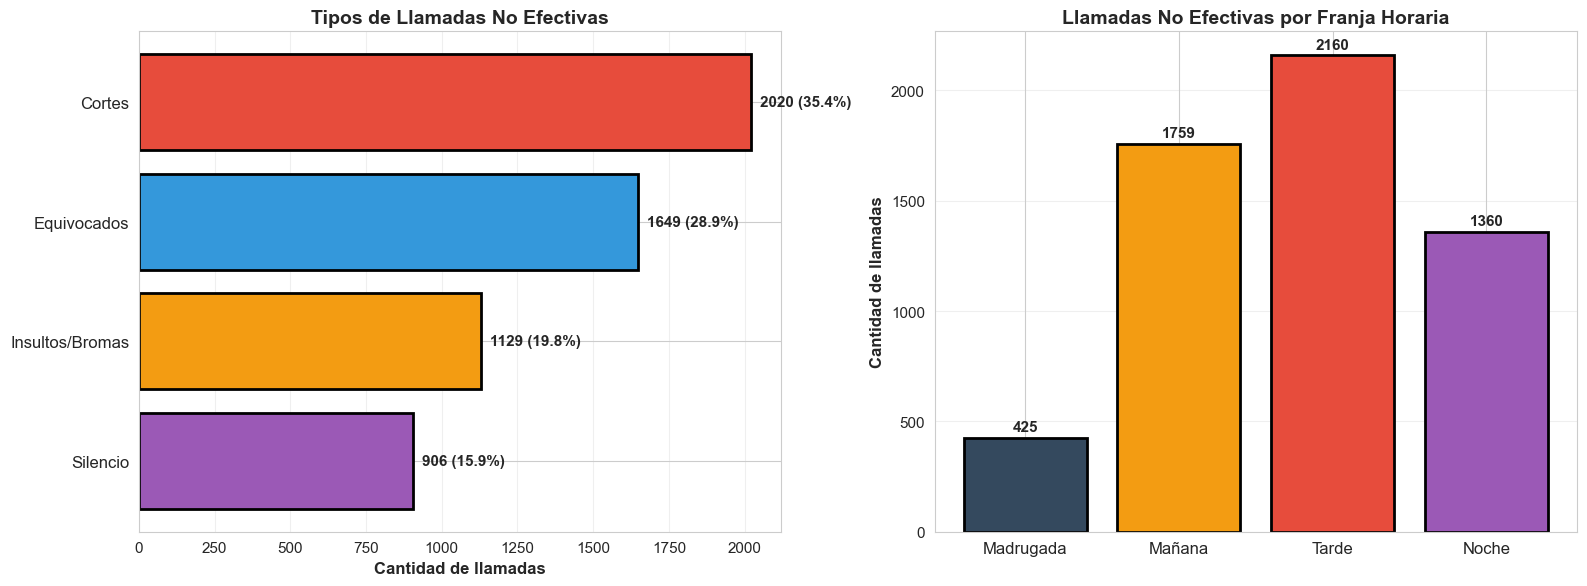

✓ Gráfico guardado: outputs/llamadas_no_efectivas.png


In [63]:
# Gráfico: Llamadas no efectivas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Tipos de llamadas no efectivas
tipos_no_efectivas = df_no_efectivas['NO EFECTIVA DESCRIPCION'].value_counts()
colores_no_efectivas = ['#e74c3c', '#3498db', '#f39c12', '#9b59b6']

ax1.barh(range(len(tipos_no_efectivas)), tipos_no_efectivas.values, 
         color=colores_no_efectivas, edgecolor='black', linewidth=2)
ax1.set_yticks(range(len(tipos_no_efectivas)))
ax1.set_yticklabels(tipos_no_efectivas.index, fontsize=12)
ax1.set_xlabel('Cantidad de llamadas', fontsize=12, fontweight='bold')
ax1.set_title('Tipos de Llamadas No Efectivas', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.invert_yaxis()

# Agregar valores y porcentajes
for i, v in enumerate(tipos_no_efectivas.values):
    pct = v/len(df_no_efectivas)*100
    ax1.text(v + 30, i, f'{v} ({pct:.1f}%)', va='center', fontsize=11, fontweight='bold')

# Subplot 2: Por franja horaria
franja_no_efectivas = df_no_efectivas['FRANJA_HORARIA'].value_counts()
orden_franjas = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
franja_no_efectivas = franja_no_efectivas.reindex(orden_franjas)

ax2.bar(range(len(franja_no_efectivas)), franja_no_efectivas.values,
        color=['#34495e', '#f39c12', '#e74c3c', '#9b59b6'],
        edgecolor='black', linewidth=2)
ax2.set_xticks(range(len(franja_no_efectivas)))
ax2.set_xticklabels(franja_no_efectivas.index, fontsize=12)
ax2.set_ylabel('Cantidad de llamadas', fontsize=12, fontweight='bold')
ax2.set_title('Llamadas No Efectivas por Franja Horaria', fontsize=14, fontweight='bold')
ax2.grid(axis='y', alpha=0.3)

# Agregar valores
for i, v in enumerate(franja_no_efectivas.values):
    ax2.text(i, v + 30, str(v), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/llamadas_no_efectivas.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/llamadas_no_efectivas.png")


In [64]:
# Exportar dataset con clusters asignados
df_con_clusters = df_efectivas[['ID', 'FECHA EN QUE SE CREO', 'TIPO DE CONSULTA', 
                                 'CONSULTANTE', 'EDAD CONSUMIDOR', 'GENERO CONSUMIDOR',
                                 'PROVINCIA CONSULTANTE', 'MOTIVO DE CONSULTA', 
                                 'TRATAMIENTO', 'TIEMPO DE CONSUMO', 'FRANJA_HORARIA',
                                 'DIA_SEMANA', 'cluster']].copy()

# Agregar nombre del cluster
nombres_clusters = {
    0: 'Consultas Informativas',
    1: 'Adultos Crónicos',
    2: 'Jóvenes + Familias'
}
df_con_clusters['cluster_nombre'] = df_con_clusters['cluster'].map(nombres_clusters)

print("Dataset con clusters asignados:")
print(df_con_clusters.head(10))
print(f"\nTotal de filas: {len(df_con_clusters)}")

# Guardar
df_con_clusters.to_csv('../outputs/tablas/df_clusters.csv', index=False, encoding='utf-8-sig')
print("\n✓ Archivo guardado: outputs/tablas/df_clusters.csv")


Dataset con clusters asignados:
        ID FECHA EN QUE SE CREO    TIPO DE CONSULTA CONSULTANTE  \
0   345712           2025-01-01    Consulta Directa  Consumidor   
2   345714           2025-01-01    Consulta Directa  Consumidor   
3   345715           2025-01-01             Informe  Consumidor   
4   345716           2025-01-01    Consulta Directa  Consumidor   
5   345717           2025-01-01  Consulta Indirecta       Amigo   
15  345727           2025-01-01             Informe  Consumidor   
16  345728           2025-01-01  Consulta Indirecta       Madre   
17  345729           2025-01-01    Consulta Directa  Consumidor   
18  345730           2025-01-01  Consulta Indirecta       Madre   
22  345734           2025-01-01    Consulta Directa  Consumidor   

    EDAD CONSUMIDOR GENERO CONSUMIDOR            PROVINCIA CONSULTANTE  \
0                29             Varón  Ciudad Autónoma de Buenos Aires   
2                45             Varón  Ciudad Autónoma de Buenos Aires   
3       

In [65]:
# Crear tabla resumen final para PPT
perfil_clusters_ppt = pd.DataFrame({
    'Cluster': [0, 1, 2],
    'Nombre': ['Consultas Informativas', 'Adultos Crónicos', 'Jóvenes + Familias'],
    'Tamaño': ['5,782 (41.0%)', '3,177 (22.5%)', '5,132 (36.4%)'],
    'Edad_Promedio': ['N/A', '42.5 años', '26.0 años'],
    'Tipo_Consulta_Principal': ['Informe (100%)', 'Indirecta (57%)', 'Indirecta (80%)'],
    'Consultante_Principal': ['Consumidor (26%)', 'Consumidor (38%)', 'Madre (33%)'],
    'Motivo_Principal': ['N/A', 'Trastornos crónicos', 'Inquietudes tipo vida'],
    'Tratamiento_Nunca': ['N/A', '37%', '52%'],
    'Acción_Recomendada': [
        'Automatización (FAQs/chatbot)',
        'Seguimiento prolongado',
        'Derivación rápida + orientación familiar'
    ]
})

print("Tabla resumen para PPT:")
print(perfil_clusters_ppt.to_string(index=False))

# Guardar
perfil_clusters_ppt.to_csv('../outputs/tablas/perfil_clusters_ppt.csv', index=False, encoding='utf-8-sig')
print("\n✓ Archivo guardado: outputs/tablas/perfil_clusters_ppt.csv")


Tabla resumen para PPT:
 Cluster                 Nombre        Tamaño Edad_Promedio Tipo_Consulta_Principal Consultante_Principal      Motivo_Principal Tratamiento_Nunca                       Acción_Recomendada
       0 Consultas Informativas 5,782 (41.0%)           N/A          Informe (100%)      Consumidor (26%)                   N/A               N/A            Automatización (FAQs/chatbot)
       1       Adultos Crónicos 3,177 (22.5%)     42.5 años         Indirecta (57%)      Consumidor (38%)   Trastornos crónicos               37%                   Seguimiento prolongado
       2     Jóvenes + Familias 5,132 (36.4%)     26.0 años         Indirecta (80%)           Madre (33%) Inquietudes tipo vida               52% Derivación rápida + orientación familiar

✓ Archivo guardado: outputs/tablas/perfil_clusters_ppt.csv


In [66]:
# Listar todos los archivos generados
import os

print("="*80)
print("ARCHIVOS GENERADOS EN OUTPUTS/")
print("="*80)

print("\n📊 GRÁFICOS (outputs/):")
graficos = [f for f in os.listdir('../outputs') if f.endswith('.png')]
for idx, archivo in enumerate(sorted(graficos), 1):
    print(f"  {idx}. {archivo}")

print(f"\n📁 TABLAS (outputs/tablas/):")
tablas = [f for f in os.listdir('../outputs/tablas') if f.endswith('.csv')]
for idx, archivo in enumerate(sorted(tablas), 1):
    print(f"  {idx}. {archivo}")

print("\n" + "="*80)
print(f"Total: {len(graficos)} gráficos + {len(tablas)} tablas")
print("="*80)


ARCHIVOS GENERADOS EN OUTPUTS/

📊 GRÁFICOS (outputs/):
  1. comparacion_v1_v2_clustering.png
  2. grafico_consultante_cluster.png
  3. grafico_edad_cluster.png
  4. grafico_franja_horaria_cluster.png
  5. grafico_motivos_cluster.png
  6. grafico_resumen_clusters.png
  7. grafico_tipo_consulta_cluster.png
  8. grafico_tratamiento_cluster.png
  9. llamadas_no_efectivas.png
  10. metodo_codo_silhouette.png

📁 TABLAS (outputs/tablas/):
  1. df_clusters.csv
  2. perfil_clusters_ppt.csv
  3. perfil_detallado_clusters.csv
  4. resumen_clusters.csv

Total: 10 gráficos + 4 tablas


In [67]:
# Verificar reproducibilidad - métricas finales del modelo
print("="*80)
print("MÉTRICAS FINALES DEL MODELO - REPRODUCIBILIDAD")
print("="*80)

print("\n📊 CONFIGURACIÓN DEL MODELO:")
print(f"  • Algoritmo: K-Means")
print(f"  • Número de clusters: 3")
print(f"  • Random state: 42 (fijado)")
print(f"  • Features utilizados: {len(variables_numericas_v2) + len(variables_categoricas_v2)} variables")
print(f"  • Features tras One-Hot Encoding: {X_transformed_v2.shape[1]}")

print("\n📈 MÉTRICAS DE CALIDAD:")
print(f"  • Inercia: {kmeans_final.inertia_:.2f}")
print(f"  • Silhouette Score: {silhouette_score(X_transformed_v2, kmeans_final.labels_):.4f}")

print("\n📊 DISTRIBUCIÓN DE CLUSTERS:")
for cluster_id in range(3):
    count = (kmeans_final.labels_ == cluster_id).sum()
    pct = count / len(kmeans_final.labels_) * 100
    print(f"  • Cluster {cluster_id}: {count} ({pct:.1f}%)")

print("\n✅ REPRODUCIBILIDAD GARANTIZADA")
print("  • random_state=42 en KMeans")
print("  • Variables y transformaciones documentadas")
print("  • Código completo en notebook")
print("="*80)


MÉTRICAS FINALES DEL MODELO - REPRODUCIBILIDAD

📊 CONFIGURACIÓN DEL MODELO:
  • Algoritmo: K-Means
  • Número de clusters: 3
  • Random state: 42 (fijado)
  • Features utilizados: 10 variables
  • Features tras One-Hot Encoding: 67

📈 MÉTRICAS DE CALIDAD:
  • Inercia: 68611.28
  • Silhouette Score: 0.2520

📊 DISTRIBUCIÓN DE CLUSTERS:
  • Cluster 0: 5782 (41.0%)
  • Cluster 1: 3177 (22.5%)
  • Cluster 2: 5132 (36.4%)

✅ REPRODUCIBILIDAD GARANTIZADA
  • random_state=42 en KMeans
  • Variables y transformaciones documentadas
  • Código completo en notebook


In [68]:
# Actualizar requirements.txt con versiones exactas
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn

print("="*80)
print("VERSIONES DE LIBRERÍAS UTILIZADAS")
print("="*80)
print(f"pandas=={pd.__version__}")
print(f"numpy=={np.__version__}")
print(f"scikit-learn=={sklearn.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={seaborn.__version__}")
print("\n✓ Guardar estas versiones en requirements.txt para reproducibilidad exacta")
print("="*80)


VERSIONES DE LIBRERÍAS UTILIZADAS
pandas==2.3.3
numpy==2.3.4
scikit-learn==1.7.2
matplotlib==3.10.7
seaborn==0.13.2

✓ Guardar estas versiones en requirements.txt para reproducibilidad exacta


In [69]:
# Crear requirements.txt actualizado con versiones exactas
requirements_content = """pandas==2.3.3
numpy==2.3.4
scikit-learn==1.7.2
matplotlib==3.10.7
seaborn==0.13.2
"""

with open('../requirements.txt', 'w') as f:
    f.write(requirements_content)

print("✓ requirements.txt actualizado con versiones exactas")


✓ requirements.txt actualizado con versiones exactas


In [70]:
# RESUMEN FINAL DEL PROYECTO
print("="*80)
print("TRABAJO PRÁCTICO - CLUSTERING LÍNEA 141 SEDRONAR")
print("Análisis de la Información y la Decisión")
print("="*80)

print("\n📊 RESUMEN EJECUTIVO:")
print("-" * 80)
print(f"✓ Dataset: 19,795 llamadas totales (1er semestre 2025)")
print(f"✓ Llamadas efectivas analizadas: 14,091 (71.18%)")
print(f"✓ Llamadas no efectivas: 5,704 (28.82%)")
print(f"✓ Variables utilizadas: 10 (2 numéricas + 8 categóricas)")
print(f"✓ Features tras preprocesamiento: 67 (One-Hot Encoding)")
print(f"✓ Algoritmo: K-Means con k=3")
print(f"✓ Silhouette Score: 0.2520")

print("\n🎯 CLUSTERS IDENTIFICADOS:")
print("-" * 80)
print("• Cluster 0 - Consultas Informativas (41.0%): Pedidos generales sin caso específico")
print("• Cluster 1 - Adultos Crónicos (22.5%): Edad 42 años, >10 años consumo, recaídas")
print("• Cluster 2 - Jóvenes + Familias (36.4%): Edad 26 años, madres consultando, crisis")

print("\n📁 ENTREGABLES GENERADOS:")
print("-" * 80)
print("📊 Gráficos (10):")
print("  1. Comparación V1 vs V2 (método del codo y silhouette)")
print("  2. Distribución tipo de consulta por cluster")
print("  3. Top 5 motivos de consulta por cluster")
print("  4. Antecedentes de tratamiento por cluster")
print("  5. Boxplot de edad por cluster")
print("  6. Distribución franja horaria por cluster")
print("  7. Top 5 consultantes por cluster")
print("  8. Resumen ejecutivo (pie + barras edad)")
print("  9. Llamadas no efectivas")
print("  10. Método del codo inicial (V1)")

print("\n📄 Tablas CSV (4):")
print("  1. df_clusters.csv - Dataset completo con clusters asignados")
print("  2. resumen_clusters.csv - Resumen por cluster (tamaño, edad)")
print("  3. perfil_detallado_clusters.csv - Top 3 categorías por variable")
print("  4. perfil_clusters_ppt.csv - Tabla resumen para presentación")

print("\n💡 VALOR PARA EL NEGOCIO:")
print("-" * 80)
print("✓ Identificación de perfiles diferenciados de demanda")
print("✓ Optimización de recursos según tipo de consulta")
print("✓ Priorización de intervenciones (jóvenes vs. crónicos)")
print("✓ Mejora de canales de atención (automatización para informativas)")
print("✓ Base para políticas públicas basadas en evidencia")

print("\n🔄 REPRODUCIBILIDAD:")
print("-" * 80)
print("✓ random_state=42 fijado en K-Means")
print("✓ Versiones de librerías documentadas en requirements.txt")
print("✓ Pipeline completo documentado en notebook")
print("✓ Datos públicos de datos.gob.ar")

print("\n" + "="*80)
print("✅ ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)


TRABAJO PRÁCTICO - CLUSTERING LÍNEA 141 SEDRONAR
Análisis de la Información y la Decisión

📊 RESUMEN EJECUTIVO:
--------------------------------------------------------------------------------
✓ Dataset: 19,795 llamadas totales (1er semestre 2025)
✓ Llamadas efectivas analizadas: 14,091 (71.18%)
✓ Llamadas no efectivas: 5,704 (28.82%)
✓ Variables utilizadas: 10 (2 numéricas + 8 categóricas)
✓ Features tras preprocesamiento: 67 (One-Hot Encoding)
✓ Algoritmo: K-Means con k=3
✓ Silhouette Score: 0.2520

🎯 CLUSTERS IDENTIFICADOS:
--------------------------------------------------------------------------------
• Cluster 0 - Consultas Informativas (41.0%): Pedidos generales sin caso específico
• Cluster 1 - Adultos Crónicos (22.5%): Edad 42 años, >10 años consumo, recaídas
• Cluster 2 - Jóvenes + Familias (36.4%): Edad 26 años, madres consultando, crisis

📁 ENTREGABLES GENERADOS:
--------------------------------------------------------------------------------
📊 Gráficos (10):
  1. Comparaci

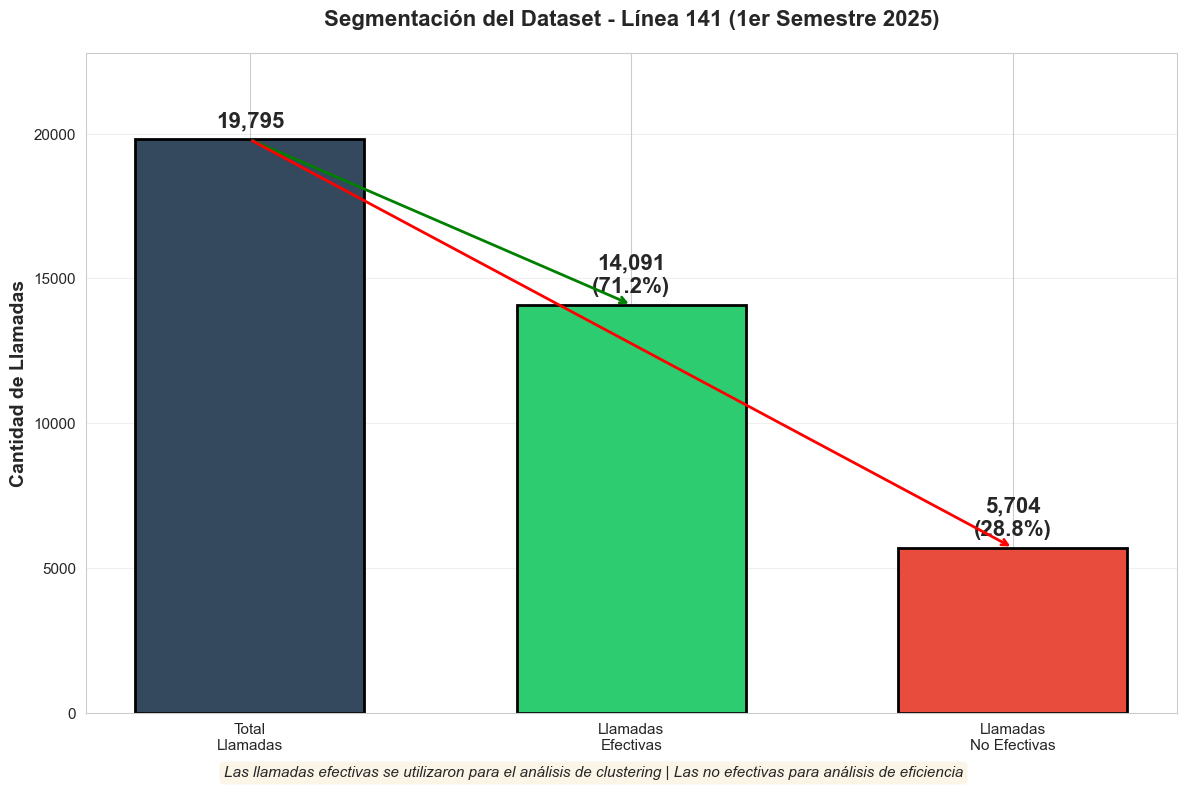

✓ Gráfico guardado: outputs/grafico_segmentacion_dataset.png


In [71]:
# Gráfico para SLIDE 2: Segmentación del dataset
fig, ax = plt.subplots(figsize=(12, 8))

# Datos
categorias = ['Total\nLlamadas', 'Llamadas\nEfectivas', 'Llamadas\nNo Efectivas']
valores = [len(df), len(df_efectivas), len(df_no_efectivas)]
colores = ['#34495e', '#2ecc71', '#e74c3c']

# Crear barras
bars = ax.bar(categorias, valores, color=colores, edgecolor='black', linewidth=2, width=0.6)

# Agregar valores y porcentajes en las barras
for i, (bar, valor) in enumerate(zip(bars, valores)):
    height = bar.get_height()
    if i == 0:
        # Total - solo número
        ax.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'{valor:,}', ha='center', va='bottom', 
                fontsize=16, fontweight='bold')
    else:
        # Efectivas y No efectivas - número + porcentaje
        porcentaje = (valor / len(df)) * 100
        ax.text(bar.get_x() + bar.get_width()/2., height + 300,
                f'{valor:,}\n({porcentaje:.1f}%)', ha='center', va='bottom', 
                fontsize=16, fontweight='bold')

# Configuración del gráfico
ax.set_ylabel('Cantidad de Llamadas', fontsize=14, fontweight='bold')
ax.set_title('Segmentación del Dataset - Línea 141 (1er Semestre 2025)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_ylim(0, max(valores) * 1.15)
ax.grid(axis='y', alpha=0.3)

# Agregar anotaciones explicativas
ax.annotate('', xy=(1, len(df_efectivas)), xytext=(0, len(df)),
            arrowprops=dict(arrowstyle='->', lw=2, color='green'))
ax.annotate('', xy=(2, len(df_no_efectivas)), xytext=(0, len(df)),
            arrowprops=dict(arrowstyle='->', lw=2, color='red'))

# Nota al pie
fig.text(0.5, 0.02, 
         'Las llamadas efectivas se utilizaron para el análisis de clustering | Las no efectivas para análisis de eficiencia',
         ha='center', fontsize=11, style='italic',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
plt.subplots_adjust(bottom=0.1)
plt.savefig('../outputs/grafico_segmentacion_dataset.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Gráfico guardado: outputs/grafico_segmentacion_dataset.png")


In [73]:
import subprocess

subprocess.run([
    'jupyter', 'nbconvert', 
    '--to', 'html', 
    'notebooks/01_clustering_linea141.ipynb',
    '--output-dir', 'outputs/'
])

print("✅ Notebook exportado a HTML en outputs/")


✅ Notebook exportado a HTML en outputs/
